#  ID: A1822 
Submission Date: 30/05/2019



# Kaggle House Price Assignment

## Abstract:

The “House Prices: Advanced Regression Techniques” on Kaggle is a regression problem. It is a “playground” problem with a sizable dataset. Proper data preprocessing, mining and feature engineering is crucial for getting good predictions on this data. A shallow fully connected NN (via TensorFlow low level API) was the selected model for this assignment. As a starting point and base guideline Dataquest’s “Getting Started with Kaggle: House Prices Competition” and the Kaggle notebook of user “surya635” and "humananalog"  was used. Majority of feature engineering techniques were discovered by reading various blogs/articles.  [1][5][8]





## 1. Data investigation and pre-processing:

### 1.1 Feature info

['test.csv', 'train.csv', 'sample_submission.csv', 'data_description.txt']
Data shape: (1460, 81)
___________________________
Data types:
 object     43
int64      35
float64     3
Name: types, dtype: int64
___________________________


types  counts       ...          kurtosis  corr SalePrice
SalePrice        int64    1460       ...          6.536282        1.000000
OverallQual      int64    1460       ...          0.096293        0.790982
GrLivArea        int64    1460       ...          4.895121        0.708624
GarageCars       int64    1460       ...          0.220998        0.640409
GarageArea       int64    1460       ...          0.917067        0.623431
TotalBsmtSF      int64    1460       ...         13.250483        0.613581
1stFlrSF         int64    1460       ...          5.745841        0.605852
FullBath         int64    1460       ...         -0.857043        0.560664
TotRmsAbvGrd     int64    1460       ...          0.880762        0.533723
YearBuilt        int64    1460       ...         -0.439552        0.522897
YearRemodAdd     int64    1460       ...         -1.272245        0.507101
GarageYrBlt    float64    1379       ...         -0.418341        0.486362
MasVnrArea     float64    1452       ...         10.082417        0.477493
Fireplaces       int64    1460       ...         -0.217237        0.466929
BsmtFinSF1       int64    1460       ...         11.118236        0.386420
LotFrontage    float64    1201       ...         17.452867        0.351799
WoodDeckSF       int64    1460       ...          2.992951        0.324413
2ndFlrSF         int64    1460       ...         -0.553464        0.319334
OpenPorchSF      int64    1460       ...          8.490336        0.315856
HalfBath         int64    1460       ...         -1.076927        0.284108
LotArea          int64    1460       ...        203.243271        0.263843
BsmtFullBath     int64    1460       ...         -0.839098        0.227122
BsmtUnfSF        int64    1460       ...          0.474994        0.214479
BedroomAbvGr     int64    1460       ...          2.230875        0.168213
ScreenPorch      int64    1460       ...         18.439068        0.111447
PoolArea         int64    1460       ...        223.268499        0.092404
MoSold           int64    1460       ...         -0.404109        0.046432
3SsnPorch        int64    1460       ...        123.662379        0.044584
BsmtFinSF2       int64    1460       ...         20.113338       -0.011378
BsmtHalfBath     int64    1460       ...         16.396642       -0.016844
...                ...     ...       ...               ...             ...
RoofStyle       object    1460       ...               NaN             NaN
RoofMatl        object    1460       ...               NaN             NaN
Exterior1st     object    1460       ...               NaN             NaN
Exterior2nd     object    1460       ...               NaN             NaN
MasVnrType      object    1452       ...               NaN             NaN
ExterQual       object    1460       ...               NaN             NaN
ExterCond       object    1460       ...               NaN             NaN
Foundation      object    1460       ...               NaN             NaN
BsmtQual        object    1423       ...               NaN             NaN
BsmtCond        object    1423       ...               NaN             NaN
BsmtExposure    object    1422       ...               NaN             NaN
BsmtFinType1    object    1423       ...               NaN             NaN
BsmtFinType2    object    1422       ...               NaN             NaN
Heating         object    1460       ...               NaN             NaN
HeatingQC       object    1460       ...               NaN             NaN
CentralAir      object    1460       ...               NaN             NaN
Electrical      object    1459       ...               NaN             NaN
KitchenQual     object    1460       ...               NaN             NaN
Functional      object    1460       ...               NaN             NaN
FireplaceQu     object     770       ...               NaN             NaN
GarageType      object    1379       ...               NaN             NaN
GarageFinish    object    1379       ...  

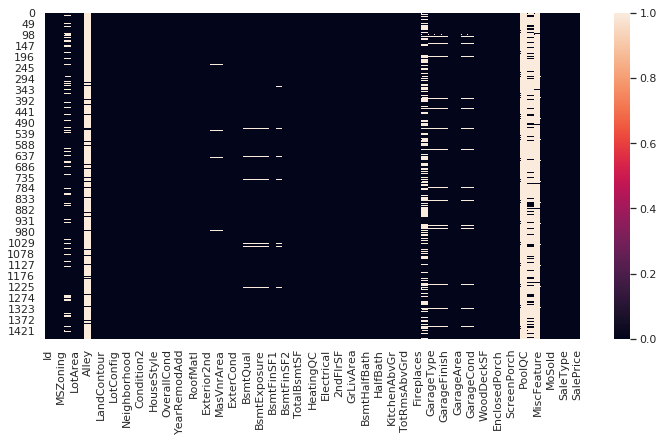

In [45]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

from IPython.display import HTML
import base64

# function that takes in a dataframe and creates a text link to  
# download it (will only work for files < 2MB or so)
def create_download_link(df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.metrics import r2_score



%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

# Importing of train and test data from Kaggle folder
# Load the data.
train_df = pd.read_csv("../input/train.csv")
train2 = pd.read_csv("../input/train.csv")
test_df = pd.read_csv("../input/test.csv")
test2 = pd.read_csv("../input/test.csv")



# Attribute info
train_df.shape
def rstr(df, pred=None): 
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques = df.apply(lambda x: [x.unique()])
    nulls = df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(lambda x: x.unique().shape[0])
    missing_ratio = (df.isnull().sum()/ obs) * 100
    skewness = df.skew()
    kurtosis = df.kurt() 
    print('Data shape:', df.shape)
    
    if pred is None:
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing ratio', 'uniques', 'skewness', 'kurtosis']
        str = pd.concat([types, counts, distincts, nulls, missing_ratio, uniques, skewness, kurtosis], axis = 1)

    else:
        corr = df.corr()[pred]
        str = pd.concat([types, counts, distincts, nulls, missing_ratio, uniques, skewness, kurtosis, corr], axis = 1, sort=False)
        corr_col = 'corr '  + pred
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing_ratio', 'uniques', 'skewness', 'kurtosis', corr_col ]
    
    str.columns = cols
    dtypes = str.types.value_counts()
    print('___________________________\nData types:\n',str.types.value_counts())
    print('___________________________')
    return str

details = rstr(train_df, 'SalePrice')
display(details.sort_values(by='corr SalePrice', ascending=False))


#plot of missing value attributes
plt.figure(figsize=(12, 6))
sns.heatmap(train_df.isnull())
plt.show()

<h2>Cell Report:</h2><br>
**1.** Our training DataFrame was broken down attribute wise to know the nature of the data, which was used for preprocessing.<br>
**2.** From the detailed table: Types indicates the attribute data type, Counts indiacates number of time the attribute is present, Distincts is the number of unique values of a feature, Uniques lists some of the Distincts, Skewness is asymmetry in a feature's distrubution and Kurtosis is the peakiness of the distribution. Saleprice correlation with each of the other attributes was shown in decending order.<br>
**3.** Number of Missing Values were graphically represented using Seaborn.<br>
**4.** Though some features like 'PoolQC', 'MiscFeature', 'Alley' and 'Fence' had a lot of missing values, they were not dropped because those missing values indicate a meaning and can be categorized(One Hot Encoded) or Label Encoded.<br>


# Preprocessing & Feature Engineering

### 1.2 Target variable

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Frequency')

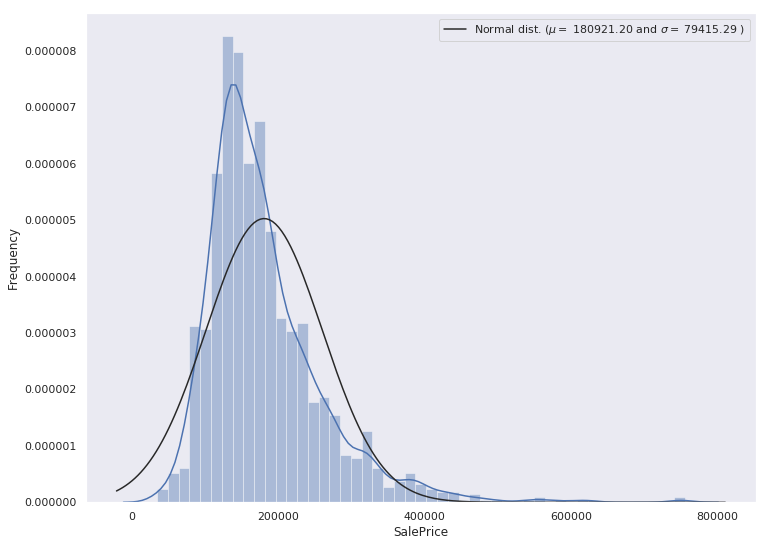

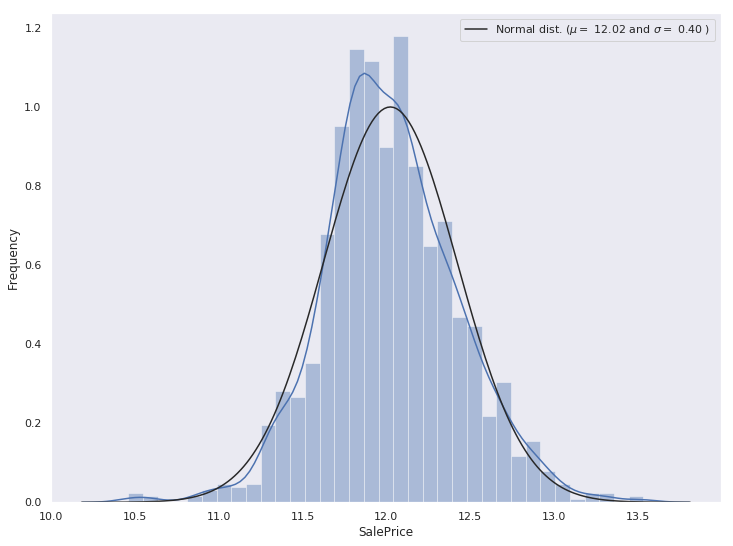

In [46]:
plt.subplots(figsize=(12,9))
sns.distplot(train_df['SalePrice'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(train_df['SalePrice'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

# fix distribution
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])
train2['SalePrice'] = np.log1p(train2['SalePrice'])
plt.subplots(figsize=(12,9))
sns.distplot(train_df['SalePrice'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(train_df['SalePrice'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

<h2>Cell Report:</h2><br>
**1.** Since the **distribution** of the target variable was **skewed** to the left, log function was used to make the distribution more **normal**. Unskewed bell curve will be easier for regression model to approximate.<br>


### 1.3 Data Correlation

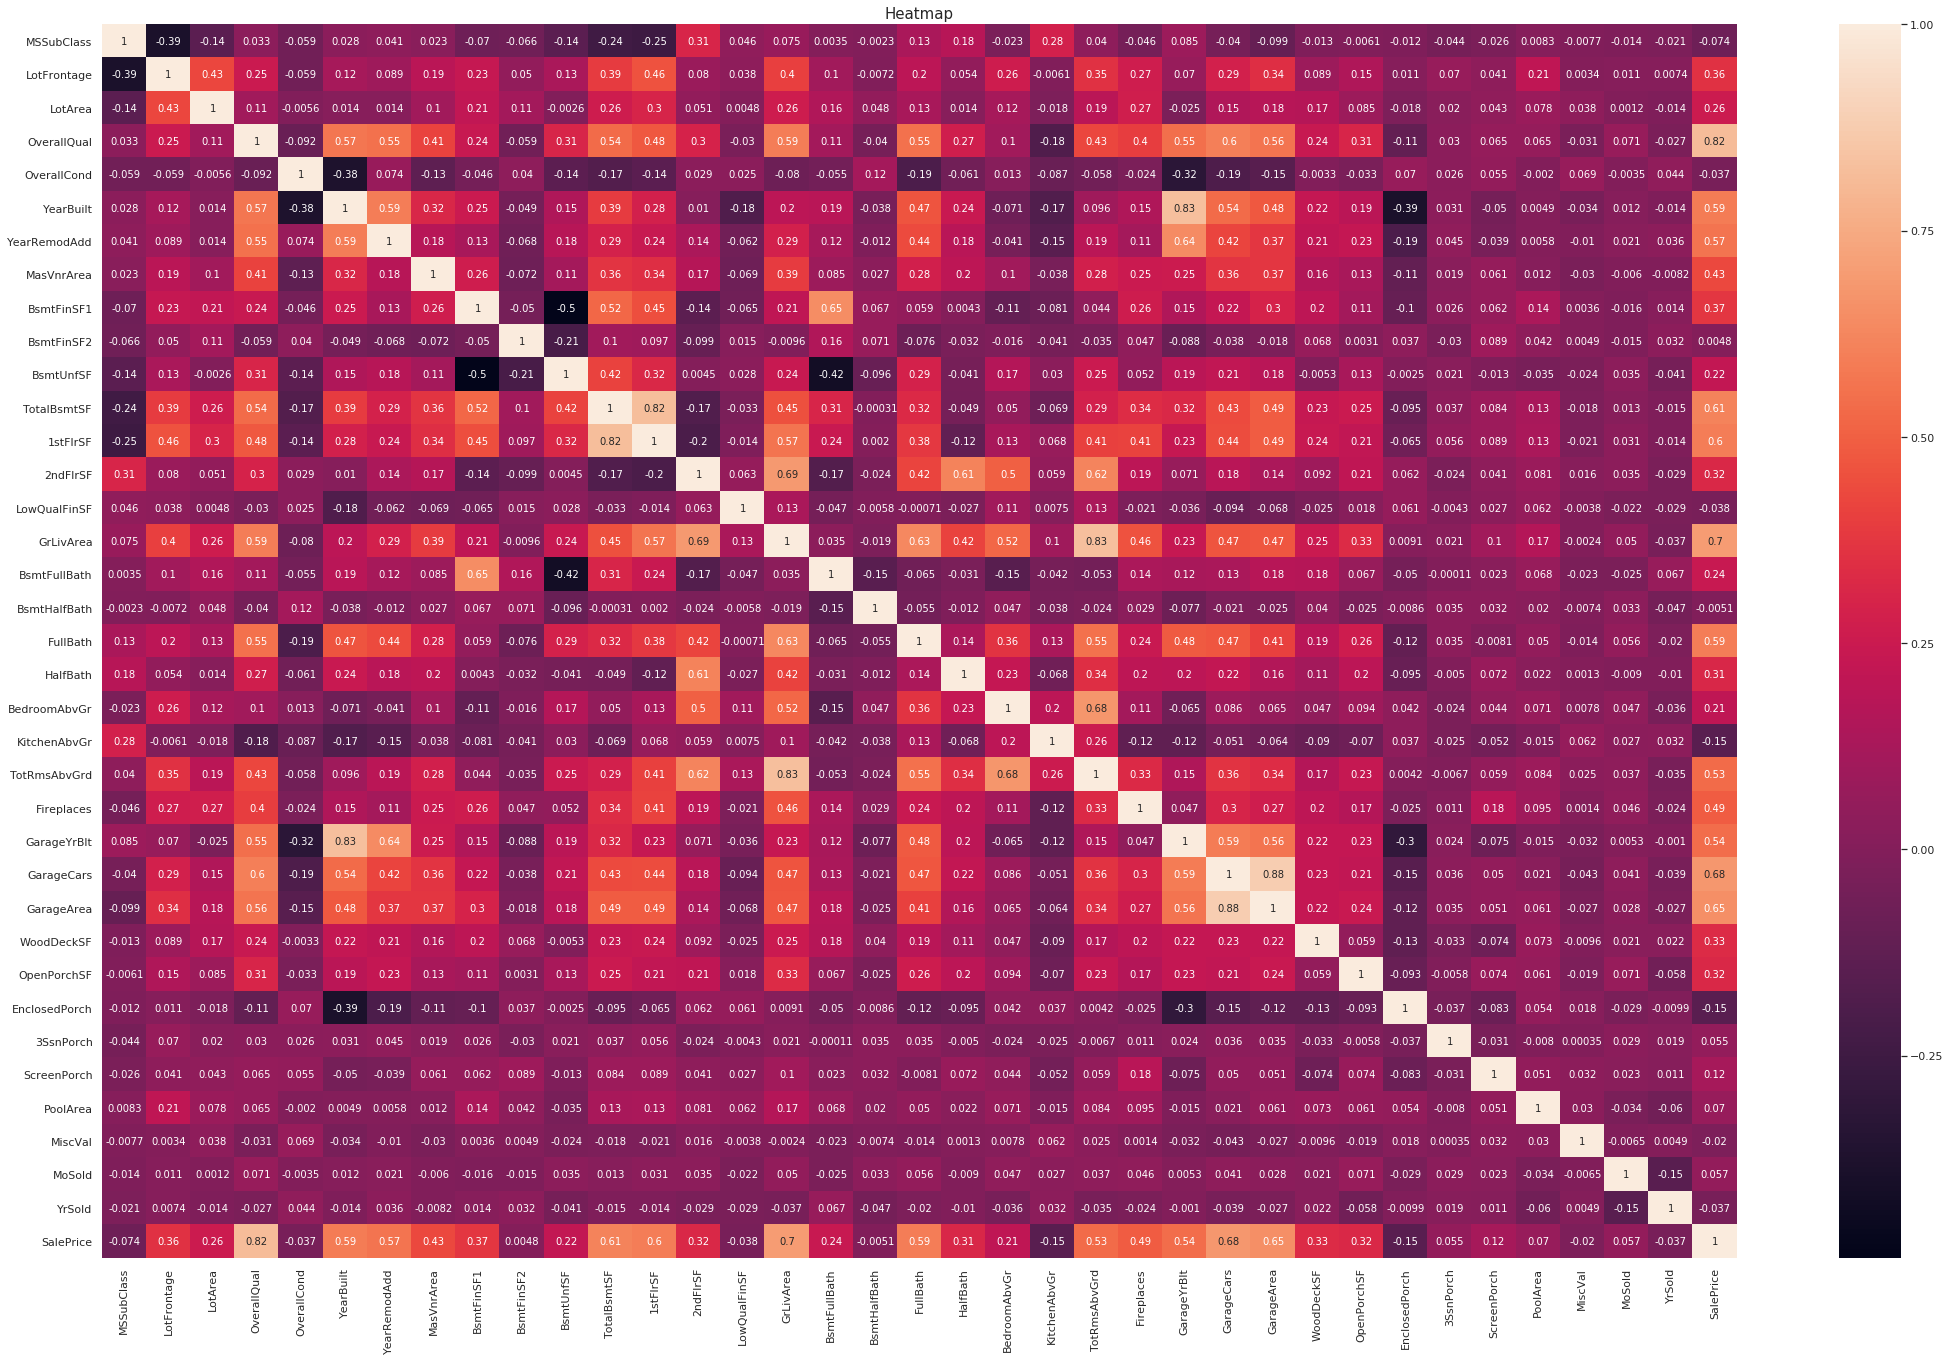

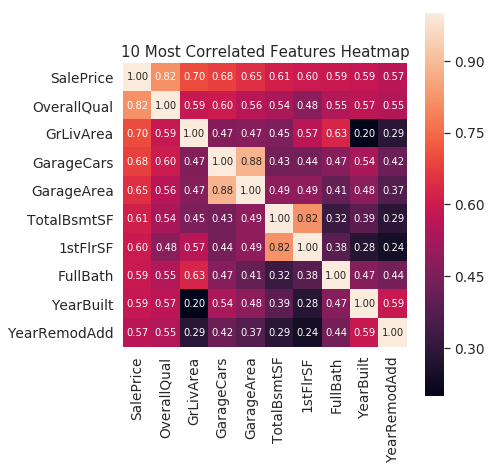

In [47]:
#Separate variable into new dataframe from original dataframe which has only numerical values
#there is 38 numerical attribute from 81 attributes
train_corr = train_df.select_dtypes(include=[np.number])
#Delete Id because that is not need for corralation plot
del train_corr['Id']
#Coralation plot
corr = train_corr.corr()
plt.subplots(figsize=(30,19))
sns.heatmap(corr,annot=True)
plt.title('Heatmap', fontsize=15)
plt.tight_layout()
plt.show()

#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(7,7))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.title('10 Most Correlated Features Heatmap', fontsize=15)
plt.tight_layout()
plt.show()


<h2>Cell Report:</h2><br>
**1.** Heatmap was made with the Correlation Matrix of the numerical features.<br>
**2.**  There are some red colored squares that emmerge from the heatmap. The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables, and the second one refers to the 'GarageX' variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity.<br>
**3.** As for SalePrice correlations, GrLivArea', 'TotalBsmtSF', and 'OverallQual' are very much lit up in the heatmap.<br>
**4.** From the 10 Most Correlated Features Heatmap we can observe that 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. 'TotalBsmtSF' and '1stFloor' have same correlation as do 'TotRmsAbvGrd' and 'GrLivArea'.  'YearBuilt' is slightly correlated<br>

### 1.4 Visualization

In [ ]:
col = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.set(style='ticks')
print('\nPairplot')
print('\nBoxplots')
print('\nNum Scatterplot')
print('\nNum Swarmplot')
sns.pairplot(train_df[col], height=3, kind='reg')
plt.tight_layout()
plt.show();



selected = ['GrLivArea',
 'LotArea',
 'BsmtUnfSF',
 '1stFlrSF',
 'TotalBsmtSF',
 'GarageArea',
 'BsmtFinSF1',
 'LotFrontage',
 'YearBuilt',
 'Neighborhood',
 'GarageYrBlt',
 'OpenPorchSF',
 'YearRemodAdd',
 'WoodDeckSF',
 'MoSold',
 '2ndFlrSF',
 'OverallCond',
 'Exterior1st',
 'YrSold',
 'OverallQual']

trainV = train2[selected].copy()
trainV['is_train'] = 1
trainV['SalePrice'] = train2['SalePrice'].values
trainV['Id'] = train2['Id'].values

testV = test2[selected].copy()
testV['is_train'] = 0
testV['SalePrice'] = 1  #dummy value
testV['Id'] = test2['Id'].values

full = pd.concat([trainV, testV])

not_features = ['Id', 'SalePrice', 'is_train']
features = [c for c in trainV.columns if c not in not_features]

cols = trainV[features].select_dtypes([np.float64, np.int64]).columns
n_rows = math.ceil(len(cols)/2)
print('\nBoxplots')
fig, ax = plt.subplots(n_rows, 2, figsize=(14, n_rows*2))
ax = ax.flatten()
for i,c in enumerate(cols):
    sns.boxplot(x=trainV[c], ax=ax[i])
    ax[i].set_title(c)
    ax[i].set_xlabel("")
plt.tight_layout()
plt.show();


num_features = ['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BsmtFinSF1', 'BsmtFinSF2', 
                'BsmtUnfSF', 'EnclosedPorch', 'GarageArea', 'GarageYrBlt', 'GrLivArea', 
                'LotArea', 'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal', 
                'OpenPorchSF', 'PoolArea', 'ScreenPorch', 'TotalBsmtSF', 'WoodDeckSF', 
                'YearBuilt', 'YearRemodAdd']

fig, axs = plt.subplots(ncols=2, nrows=11, figsize=(12, 80))
plt.subplots_adjust(right=1.5)
cmap = sns.cubehelix_palette(dark=0.3, light=0.8, as_cmap=True)

for i, feature in enumerate(num_features, 1):    
    plt.subplot(11, 2, i)
    sns.scatterplot(x=feature, y='SalePrice', hue='SalePrice', size='SalePrice', palette=cmap, data=train_df)
        
    plt.xlabel('{}'.format(feature), size=15)
    plt.ylabel('SalePrice', size=15, labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(loc='best', prop={'size': 12})

plt.show()
        



cat_features = ['Alley', 'BedroomAbvGr', 'BldgType', 'BsmtCond', 'BsmtExposure', 
                'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 
                'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 
                'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 
                'Fireplaces', 'Foundation', 'FullBath', 'Functional', 'GarageCars', 
                'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'HalfBath', 
                'Heating', 'HeatingQC', 'KitchenAbvGr', 'KitchenQual', 'LandContour', 
                'LandSlope', 'LotConfig', 'LotShape', 'MSSubClass', 'MSZoning', 
                'MasVnrType', 'MiscFeature', 'MoSold', 'Neighborhood', 'OverallCond', 
                'OverallQual', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 
                'SaleCondition', 'SaleType', 'Street', 'TotRmsAbvGrd', 'Utilities', 'YrSold']

fig, axs = plt.subplots(ncols=2, nrows=28, figsize=(18, 120))
plt.subplots_adjust(right=1.5, top=1.5)

for i, feature in enumerate(cat_features, 1):    
    plt.subplot(28, 2, i)
    sns.swarmplot(x=feature, y='SalePrice', data=train_df, palette='Set3')
        
    plt.xlabel('{}'.format(feature), size=25)
    plt.ylabel('SalePrice', size=25, labelpad=15)
    
    for j in range(2):
        if train_df[feature].value_counts().shape[0] > 10:        
            plt.tick_params(axis='x', labelsize=7)
        else:
            plt.tick_params(axis='x', labelsize=20)
        plt.tick_params(axis='y', labelsize=20)

plt.show()
            


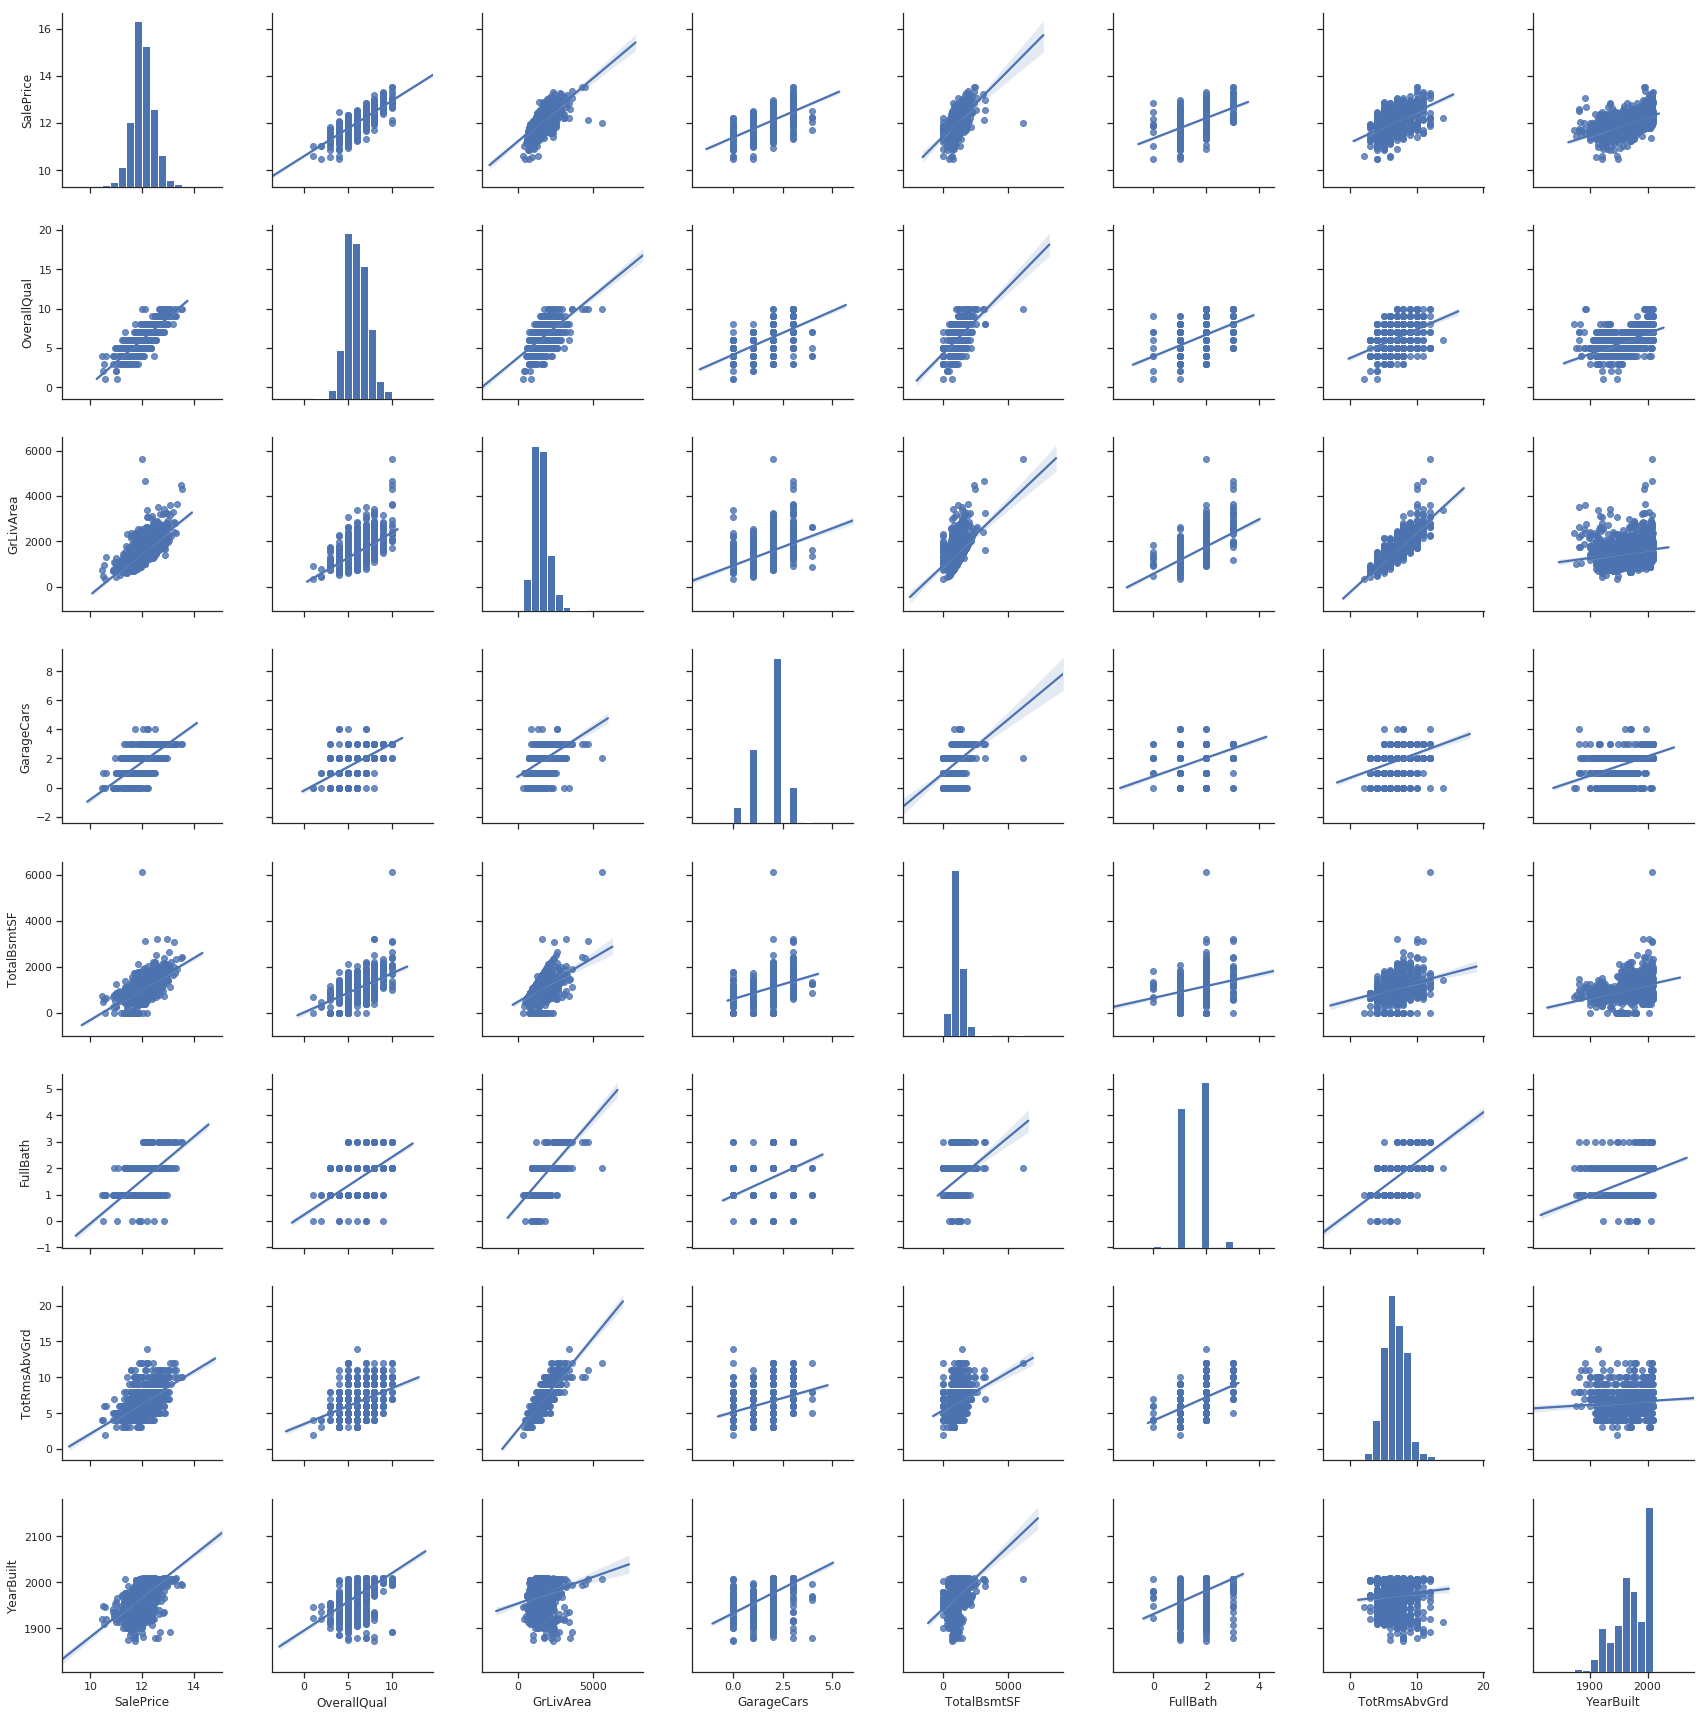

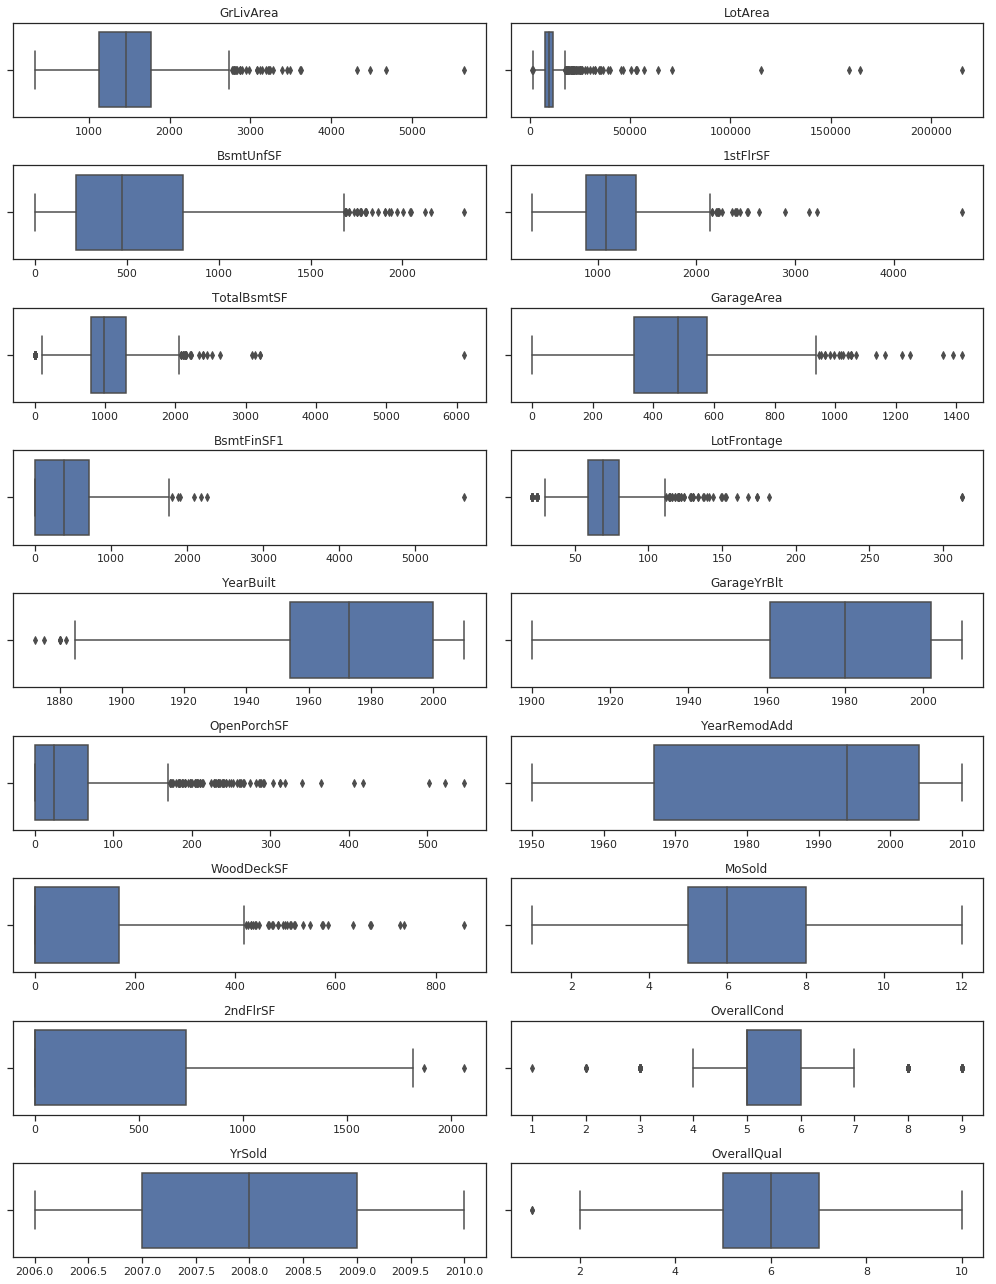

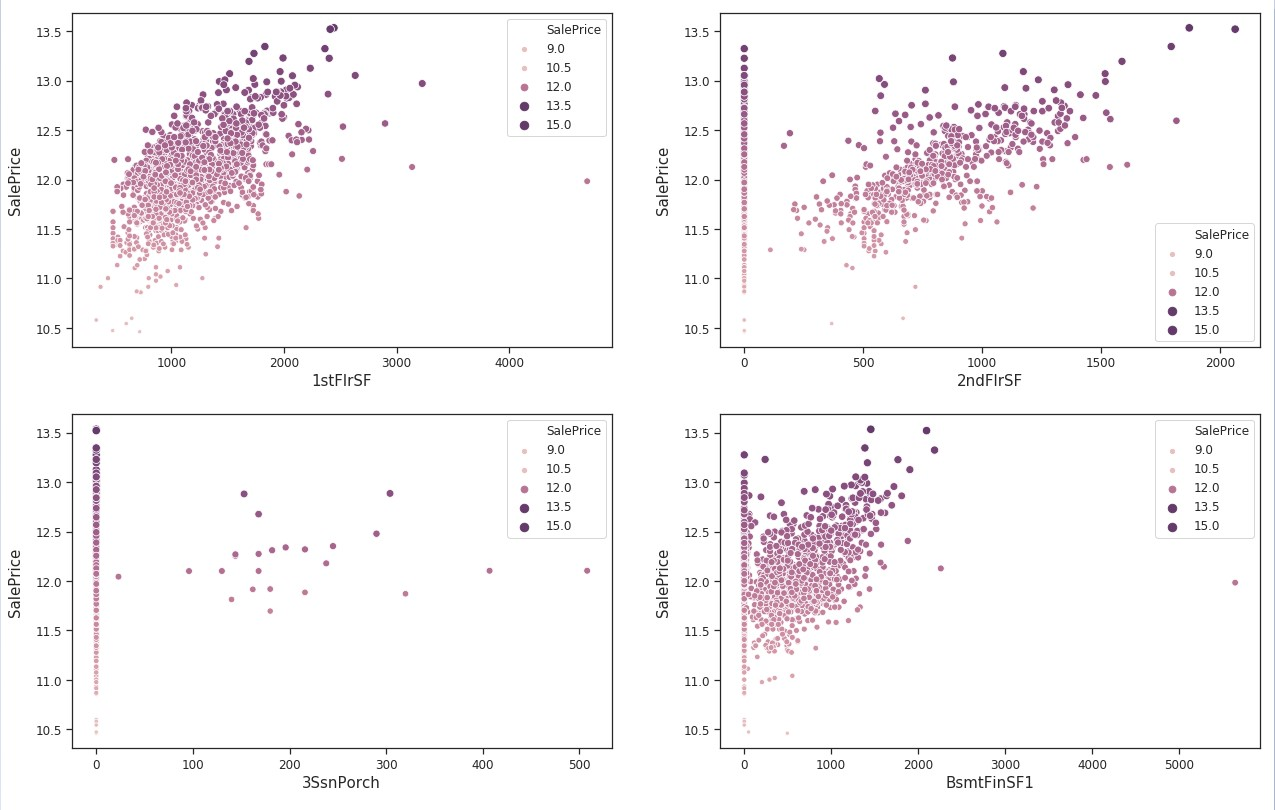

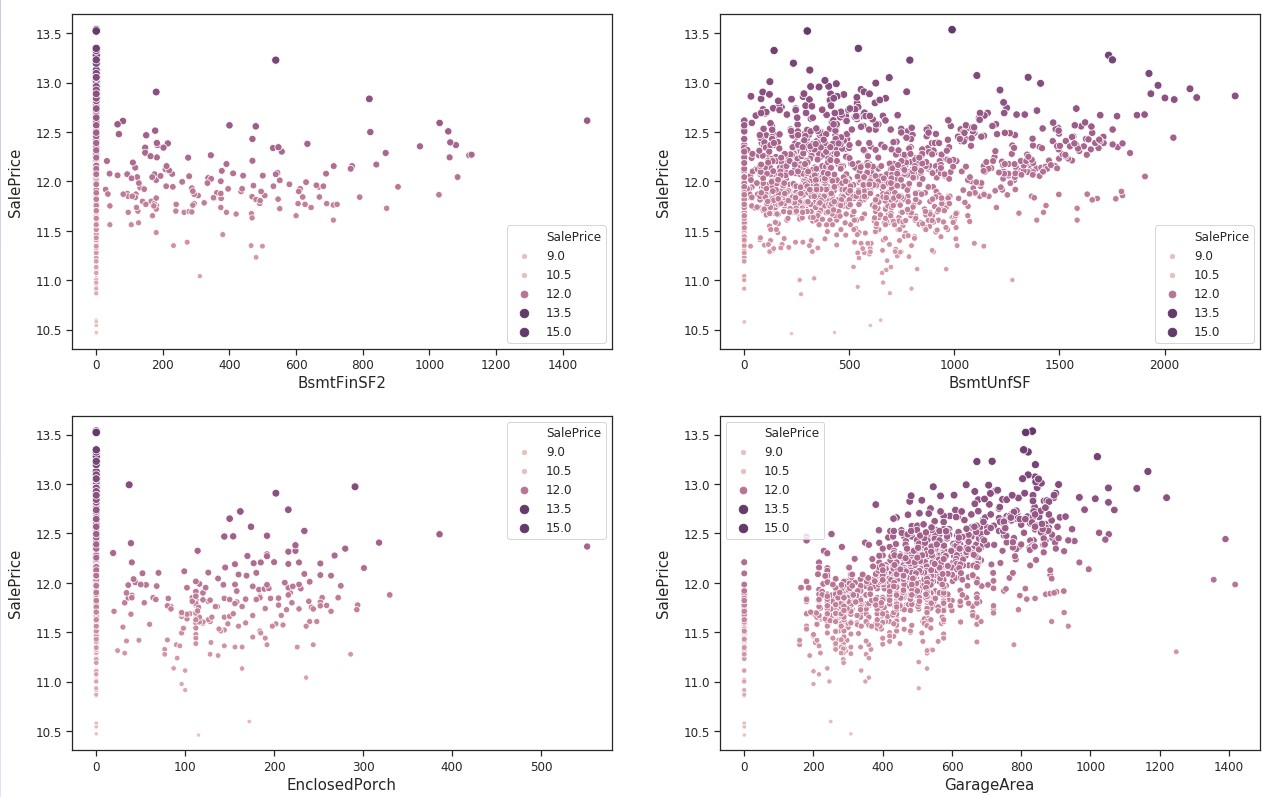

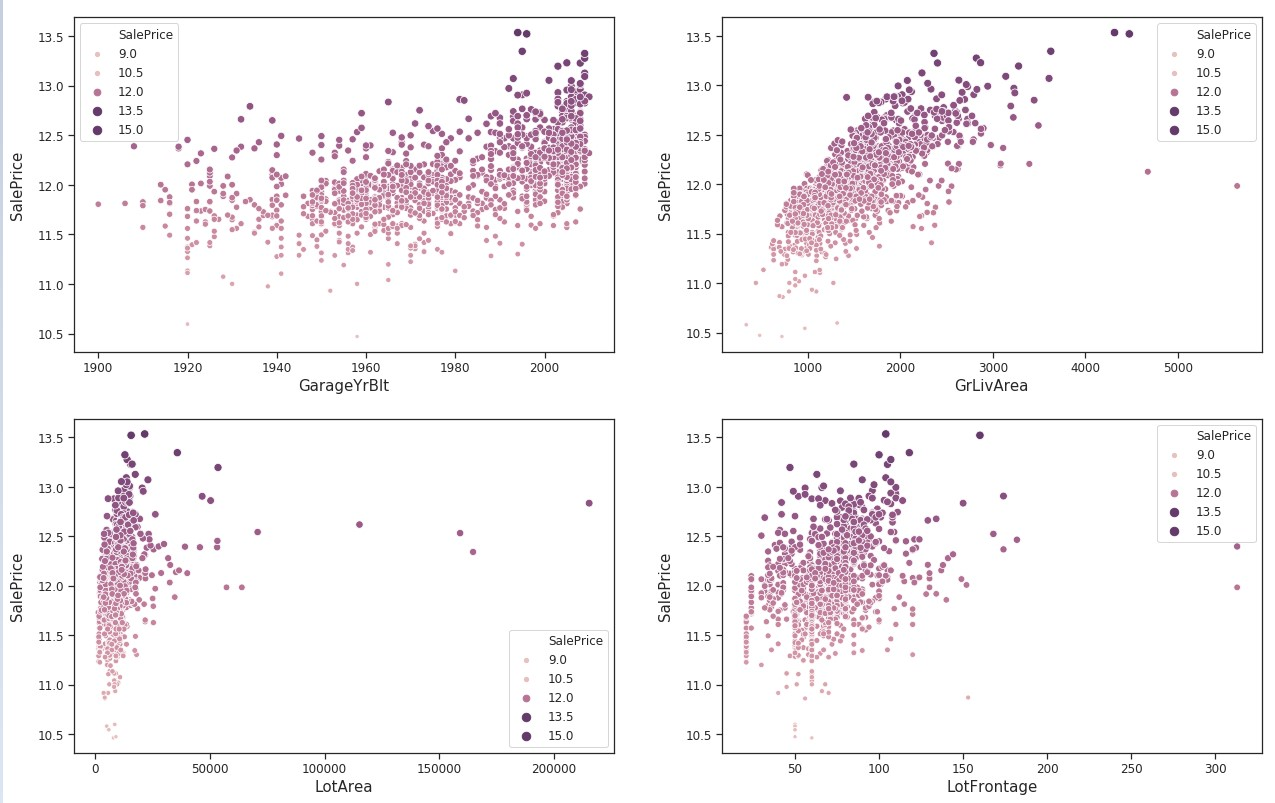

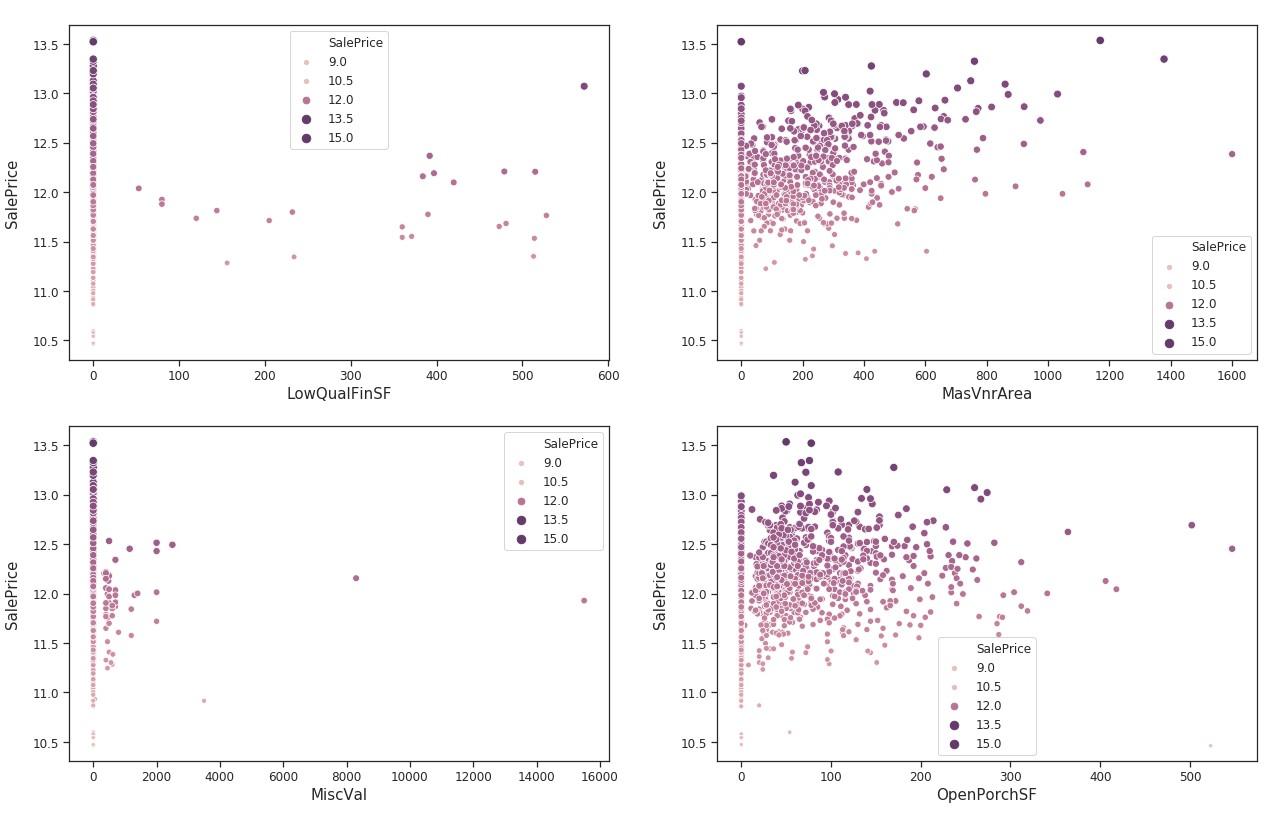

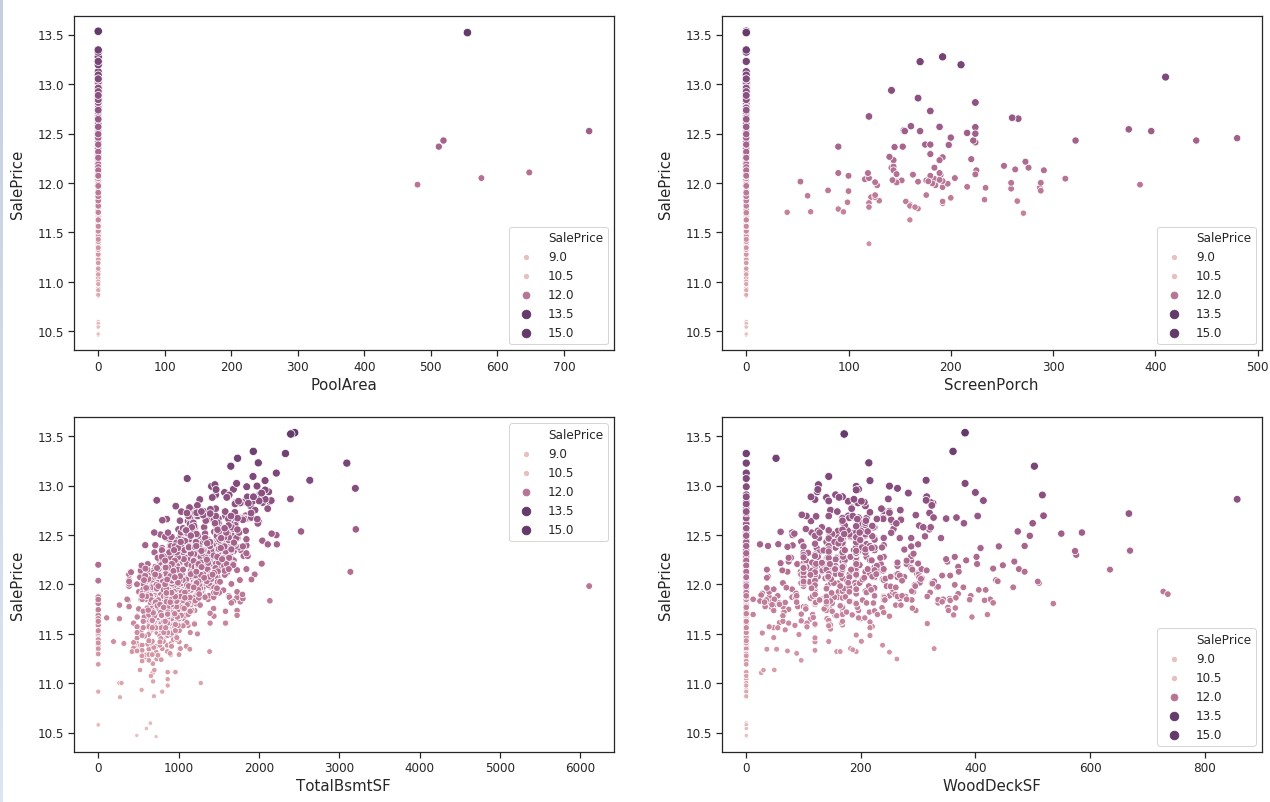
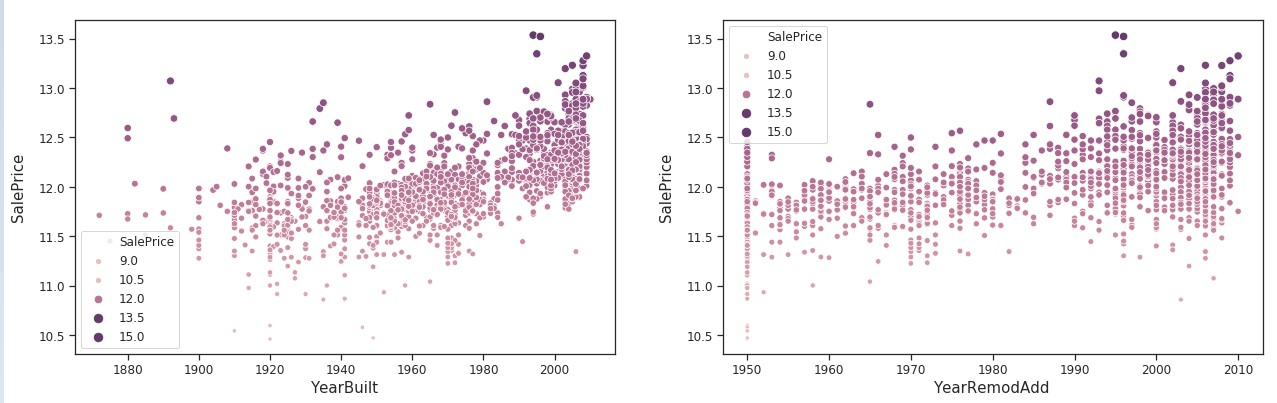

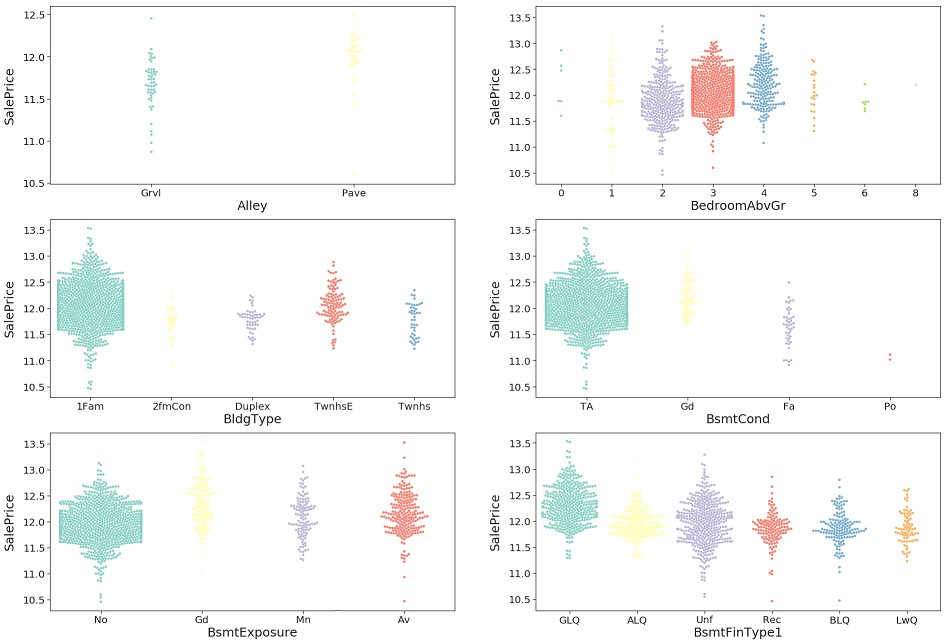

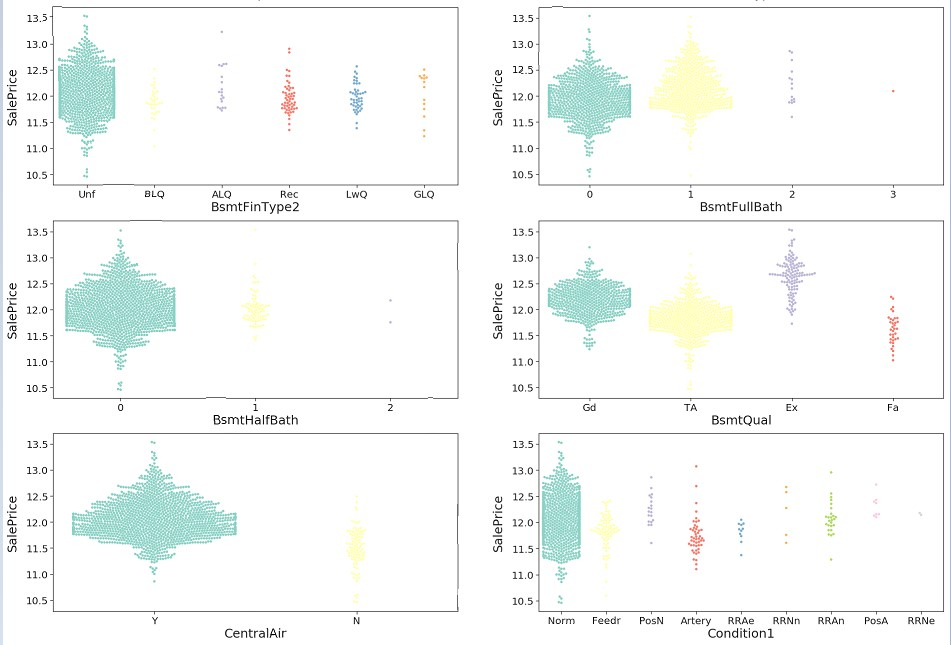

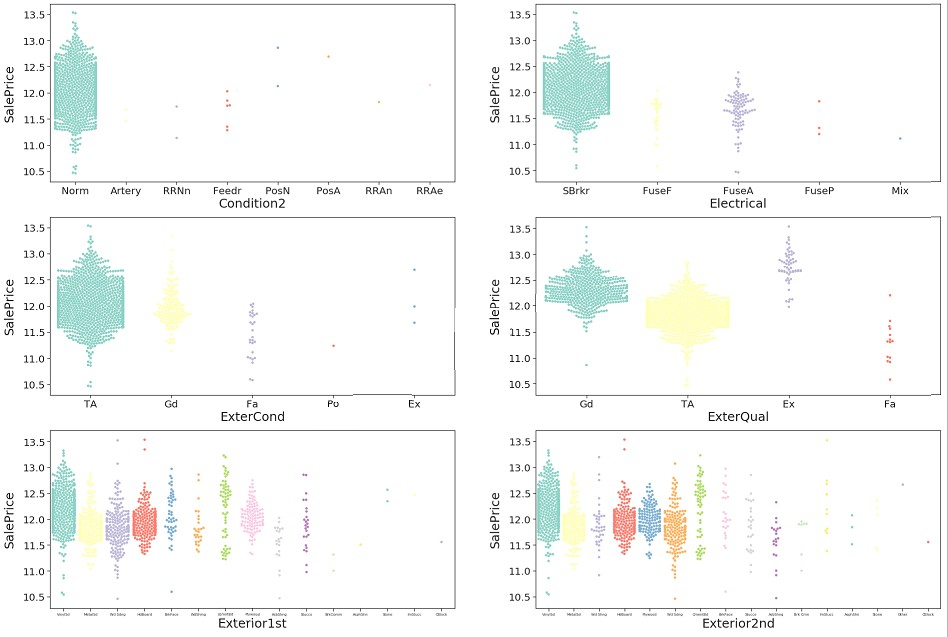

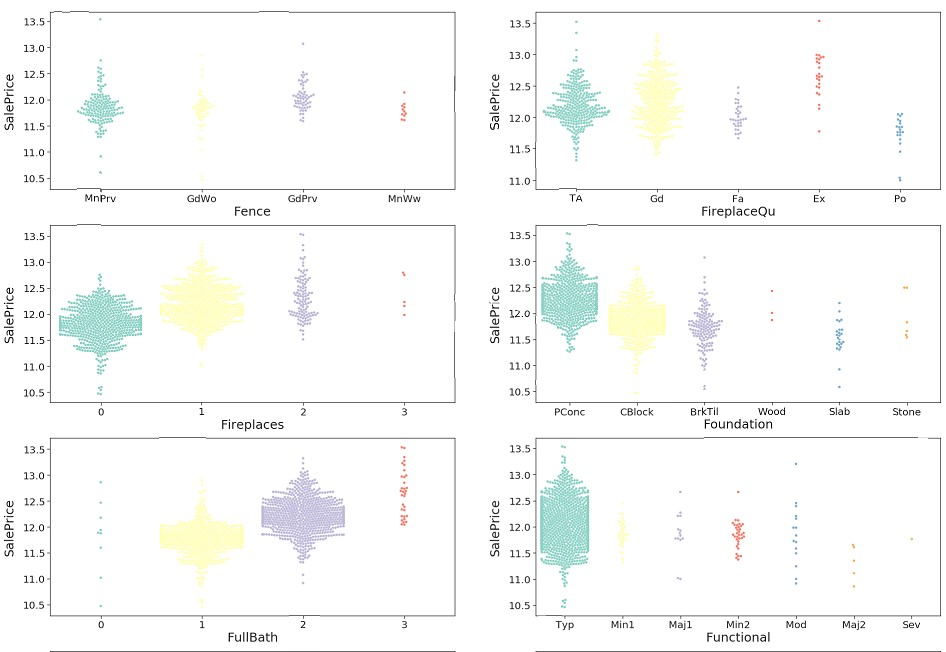

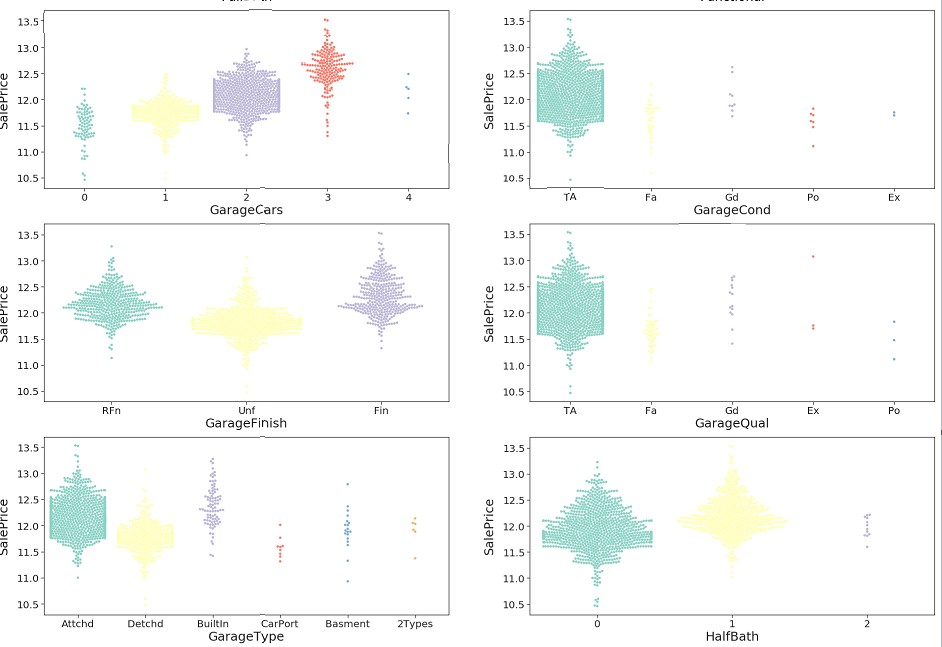

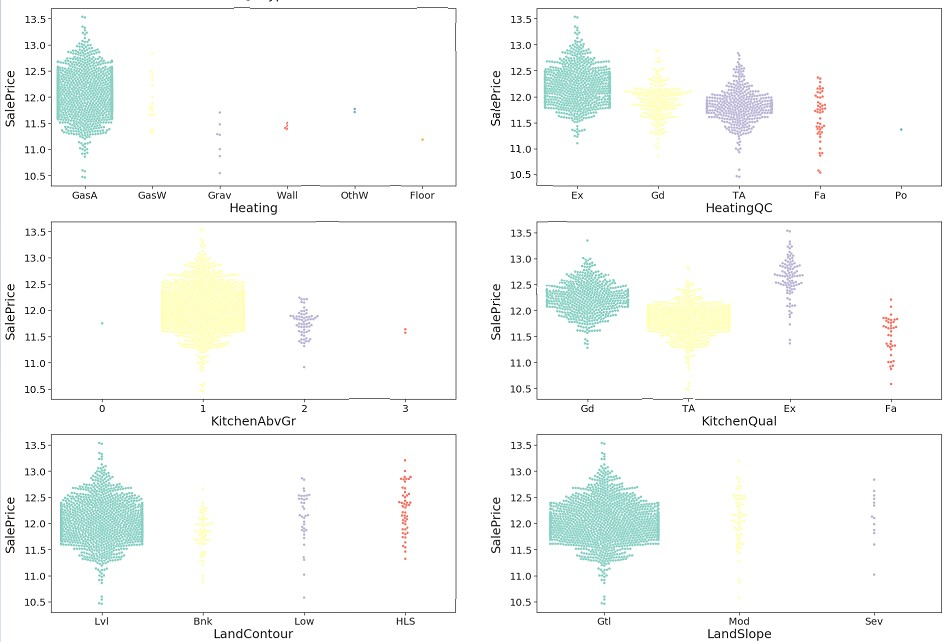

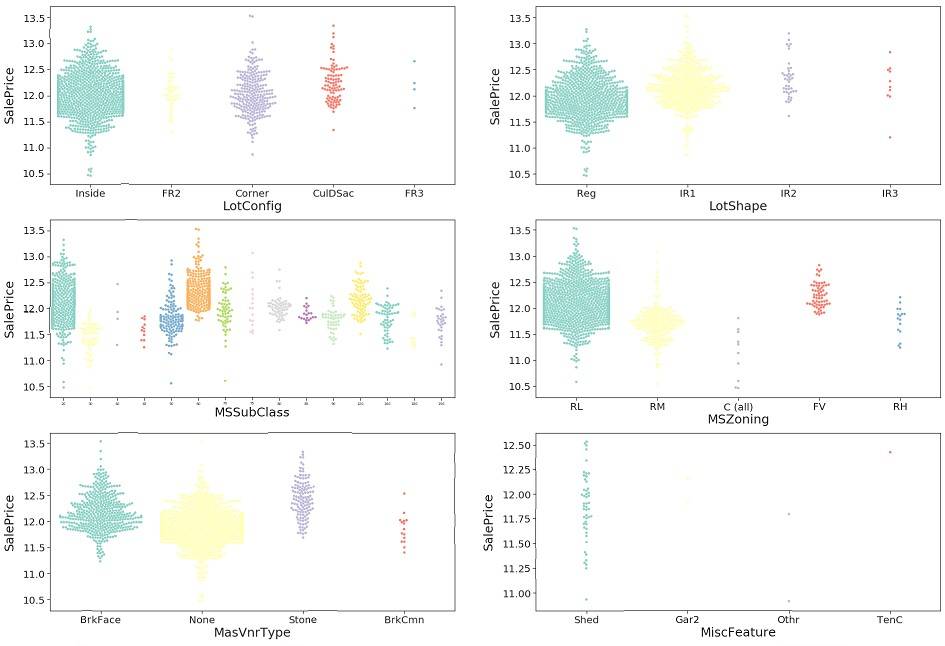

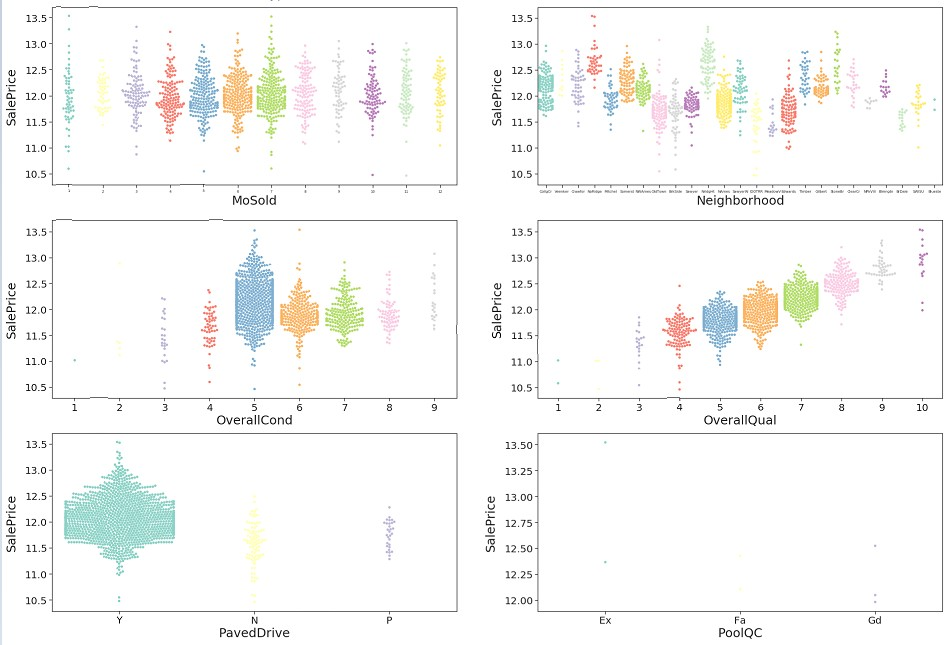

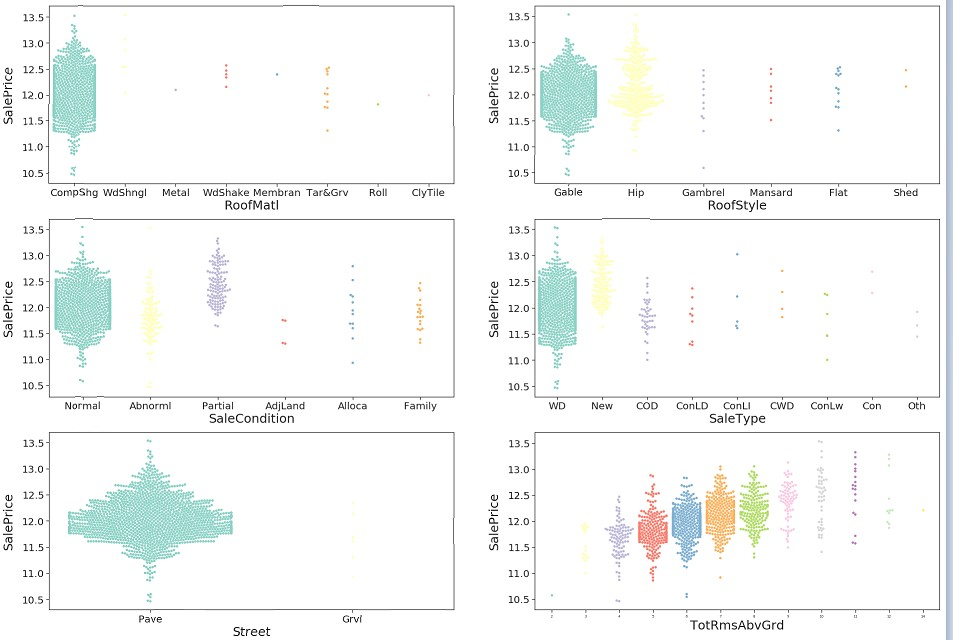

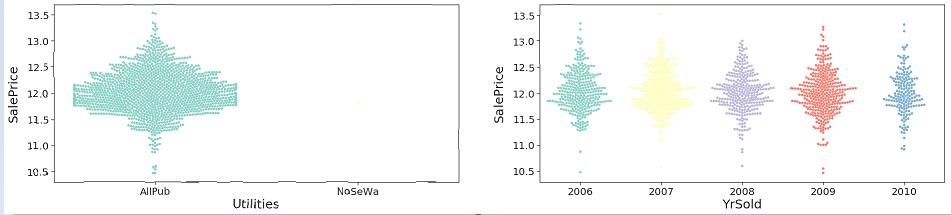

<h2>Cell Report:</h2><br>
**1.** Seaborn Pairplot was used to show the most effective Features are correlated with the Target Variable.<br> 
**2.** As for the 'TotalBsmtSF' and 'GrLiveArea' Pairplot, we can see the dots drawing a linear line, which almost acts like a border. This makes sense as basement areas are usualy equal or lower than gound living areas of houses<br>
**3.** 'SalePrice' and 'YearBuilt' Pairplot dot cloud shows some what of an exponential curve, which shows that house prices are increasing faster in recent years<br>
**4.** Some outliers can be seen from the Pairplot and Boxplots, for example there are a few houses with more than 4000 sq ft living area, these were treated later on<br>
**5.** From the Numerical Scatterplot: Data points of '2ndFlrSF', '3SsnPorch', 'BsmtFinSF1', 'BsmtFinSF2', 'EnclosedPorch', 'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'OpenPorchSF', 'PoolArea', 'ScreenPorch' and 'WoodDeckSF' features are heavily stacked at 0. Which shows these are sparse attributes and rare for most houses. Sparse features may not be reliable when they are used as continuous features, because they are going to introduce bias to the regression function. 'GarageYrBlt', 'YearBuilt' and 'YearRemodAdd' are ordinal features, but a linear relationship can be seen from their plots.<br>
**6.** From the Categorical Swarmplot: Categorical features are not strongly correlated with 'SalePrice'(some however have very distinct 'SalePrice' maximums, minimums). There are only 2 categorical features that have significant correlation with 'SalePrice', and they are 'OverallQual' and 'TotRmsAbvGrd'.<br>


## 2. Data Preprocessing

### 2.1 Data Anomaly Removal

In [48]:
# outlier revoval
train_df.drop(train_df[train_df["GrLivArea"] > 4000].index, inplace=True)
train2.drop(train2[train2["GrLivArea"] > 4000].index, inplace=True)
# The test example with ID 666 has GarageArea, GarageCars, and GarageType 
# but none of the other fields, so use the mode and median to fill them in.
test_df.loc[666, "GarageQual"] = "TA"
test_df.loc[666, "GarageCond"] = "TA"
test_df.loc[666, "GarageFinish"] = "Unf"
test_df.loc[666, "GarageYrBlt"] = "1980"

# The test example 1116 only has GarageType but no other information. We'll 
# assume it does not have a garage.
test_df.loc[1116, "GarageType"] = np.nan

# For imputing missing values: fill in missing LotFrontage values by the median
# LotFrontage of the neighborhood.
lot_frontage_by_neighborhood = train_df["LotFrontage"].groupby(train_df["Neighborhood"])


display(test_df.loc[test_df.GarageYrBlt==2207, ['GarageYrBlt', 'YearBuilt']])
test_df.loc[test_df.GarageYrBlt==2207.0, 'GarageYrBlt'] = 2007.0

display(test_df.loc[test_df.GarageYrBlt==2207, ['GarageYrBlt', 'YearBuilt']])



GarageYrBlt  YearBuilt
1132        2207       2006

Empty DataFrame
Columns: [GarageYrBlt, YearBuilt]
Index: []

<h2>Cell Report:</h2><br>
**1.** # There are a few houses with more than 4000 sq ft living area that are outliers, so those were dropped from the training data. (There is also one in the test set but those cannot be dropped as Kaggle Score function needs all test records to be present.)<br> 
**2.** The test example with ID 666 has GarageArea, GarageCars, and GarageType but none of the other fields, so use the mode and median to fill them in.<br>
**3.** Reading blog posts about this dataset showed that the test set had an anomaly (GarageYrBlt was 2207 for one record, row no.1132).<br> 



### 2.2 Feature Engineering

In [49]:
# Used to convert categorical features into ordinal numbers.
# (There's probably an easier way to do this, but it works.)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

def factorize(df, factor_df, column, fill_na=None):
    factor_df[column] = df[column]
    if fill_na is not None:
        factor_df[column].fillna(fill_na, inplace=True)
    le.fit(factor_df[column].unique())
    factor_df[column] = le.transform(factor_df[column])
    return factor_df

# Combine all the (numerical) features into one big DataFrame. We don't add 
# the one-hot encoded variables here yet, that happens later on.
def munge(df):
    all_df = pd.DataFrame(index = df.index)
    
    all_df["LotFrontage"] = df["LotFrontage"]   
    for key, group in lot_frontage_by_neighborhood:
        idx = (df["Neighborhood"] == key) & (df["LotFrontage"].isnull())
        all_df.loc[idx, "LotFrontage"] = group.median()    

    all_df["LotArea"] = df["LotArea"]

    all_df["MasVnrArea"] = df["MasVnrArea"]
    all_df["MasVnrArea"].fillna(0, inplace=True)
    
    all_df["BsmtFinSF1"] = df["BsmtFinSF1"]
    all_df["BsmtFinSF1"].fillna(0, inplace=True)

    all_df["BsmtFinSF2"] = df["BsmtFinSF2"]
    all_df["BsmtFinSF2"].fillna(0, inplace=True)

    all_df["BsmtUnfSF"] = df["BsmtUnfSF"]
    all_df["BsmtUnfSF"].fillna(0, inplace=True)

    all_df["TotalBsmtSF"] = df["TotalBsmtSF"]
    all_df["TotalBsmtSF"].fillna(0, inplace=True)

    all_df["1stFlrSF"] = df["1stFlrSF"]
    all_df["2ndFlrSF"] = df["2ndFlrSF"]
    all_df["GrLivArea"] = df["GrLivArea"]
    
    all_df["GarageArea"] = df["GarageArea"]
    all_df["GarageArea"].fillna(0, inplace=True)

    all_df["WoodDeckSF"] = df["WoodDeckSF"]
    all_df["OpenPorchSF"] = df["OpenPorchSF"]
    all_df["EnclosedPorch"] = df["EnclosedPorch"]
    all_df["3SsnPorch"] = df["3SsnPorch"]
    all_df["ScreenPorch"] = df["ScreenPorch"]
    
    all_df["BsmtFullBath"] = df["BsmtFullBath"]
    all_df["BsmtFullBath"].fillna(0, inplace=True)

    all_df["BsmtHalfBath"] = df["BsmtHalfBath"]
    all_df["BsmtHalfBath"].fillna(0, inplace=True)

    all_df["FullBath"] = df["FullBath"] 
    all_df["HalfBath"] = df["HalfBath"] 
    all_df["BedroomAbvGr"] = df["BedroomAbvGr"] 
    all_df["KitchenAbvGr"] = df["KitchenAbvGr"] 
    all_df["TotRmsAbvGrd"] = df["TotRmsAbvGrd"] 
    all_df["Fireplaces"] = df["Fireplaces"] 

    all_df["GarageCars"] = df["GarageCars"]
    all_df["GarageCars"].fillna(0, inplace=True)

    all_df["CentralAir"] = (df["CentralAir"] == "Y") * 1.0
    all_df["OverallQual"] = df["OverallQual"]
    all_df["OverallCond"] = df["OverallCond"]

    # Quality measurements are stored as text but we can convert them to 
    # numbers where a higher number means higher quality.

    qual_dict = {None: 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
    all_df["ExterQual"] = df["ExterQual"].map(qual_dict).astype(int)
    all_df["ExterCond"] = df["ExterCond"].map(qual_dict).astype(int)
    all_df["BsmtQual"] = df["BsmtQual"].map(qual_dict).astype(int)
    all_df["BsmtCond"] = df["BsmtCond"].map(qual_dict).astype(int)
    all_df["HeatingQC"] = df["HeatingQC"].map(qual_dict).astype(int)
    all_df["KitchenQual"] = df["KitchenQual"].map(qual_dict).astype(int)
    all_df["FireplaceQu"] = df["FireplaceQu"].map(qual_dict).astype(int)
    all_df["GarageQual"] = df["GarageQual"].map(qual_dict).astype(int)
    all_df["GarageCond"] = df["GarageCond"].map(qual_dict).astype(int)

    all_df["BsmtExposure"] = df["BsmtExposure"].map(
        {None: 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4}).astype(int)

    bsmt_fin_dict = {None: 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}
    all_df["BsmtFinType1"] = df["BsmtFinType1"].map(bsmt_fin_dict).astype(int)
    all_df["BsmtFinType2"] = df["BsmtFinType2"].map(bsmt_fin_dict).astype(int)

    all_df["Functional"] = df["Functional"].map(
        {None: 0, "Sal": 1, "Sev": 2, "Maj2": 3, "Maj1": 4, 
         "Mod": 5, "Min2": 6, "Min1": 7, "Typ": 8}).astype(int)

    all_df["GarageFinish"] = df["GarageFinish"].map(
        {None: 0, "Unf": 1, "RFn": 2, "Fin": 3}).astype(int)

    all_df["Fence"] = df["Fence"].map(
        {None: 0, "MnWw": 1, "GdWo": 2, "MnPrv": 3, "GdPrv": 4}).astype(int)

    all_df["YearBuilt"] = df["YearBuilt"]
    all_df["YearRemodAdd"] = df["YearRemodAdd"]

    all_df["GarageYrBlt"] = df["GarageYrBlt"]
    all_df["GarageYrBlt"].fillna(0.0, inplace=True)

    all_df["MoSold"] = df["MoSold"]
    all_df["YrSold"] = df["YrSold"]
    
    all_df["LowQualFinSF"] = df["LowQualFinSF"]
    all_df["MiscVal"] = df["MiscVal"]

    all_df["PoolQC"] = df["PoolQC"].map(qual_dict).astype(int)

    all_df["PoolArea"] = df["PoolArea"]
    all_df["PoolArea"].fillna(0, inplace=True)
    
    # Add categorical features as numbers too. It seems to help a bit.
    all_df = factorize(df, all_df, "MSSubClass")
    all_df = factorize(df, all_df, "MSZoning", "RL")
    all_df = factorize(df, all_df, "LotConfig")
    all_df = factorize(df, all_df, "Neighborhood")
    all_df = factorize(df, all_df, "Condition1")
    all_df = factorize(df, all_df, "BldgType")
    all_df = factorize(df, all_df, "HouseStyle")
    all_df = factorize(df, all_df, "RoofStyle")
    all_df = factorize(df, all_df, "Exterior1st", "Other")
    all_df = factorize(df, all_df, "Exterior2nd", "Other")
    all_df = factorize(df, all_df, "MasVnrType", "None")
    all_df = factorize(df, all_df, "Foundation")
    all_df = factorize(df, all_df, "SaleType", "Oth")
    all_df = factorize(df, all_df, "SaleCondition")

    # IR2 and IR3 don't appear that often, so just make a distinction
    # between regular and irregular.
    all_df["IsRegularLotShape"] = (df["LotShape"] == "Reg") * 1

    # Most properties are level; bin the other possibilities together
    # as "not level".
    all_df["IsLandLevel"] = (df["LandContour"] == "Lvl") * 1

    # Most land slopes are gentle; treat the others as "not gentle".
    all_df["IsLandSlopeGentle"] = (df["LandSlope"] == "Gtl") * 1

    # Most properties use standard circuit breakers.
    all_df["IsElectricalSBrkr"] = (df["Electrical"] == "SBrkr") * 1

    # About 2/3rd have an attached garage.
    all_df["IsGarageDetached"] = (df["GarageType"] == "Detchd") * 1

    # Most have a paved drive. Treat dirt/gravel and partial pavement
    # as "not paved".
    all_df["IsPavedDrive"] = (df["PavedDrive"] == "Y") * 1

    # The only interesting "misc. feature" is the presence of a shed.
    all_df["HasShed"] = (df["MiscFeature"] == "Shed") * 1.  

    # If YearRemodAdd != YearBuilt, then a remodeling took place at some point.
    all_df["Remodeled"] = (all_df["YearRemodAdd"] != all_df["YearBuilt"]) * 1
    
    # Did a remodeling happen in the year the house was sold?
    all_df["RecentRemodel"] = (all_df["YearRemodAdd"] == all_df["YrSold"]) * 1
    
    # Was this house sold in the year it was built?
    all_df["VeryNewHouse"] = (all_df["YearBuilt"] == all_df["YrSold"]) * 1

    all_df["Has2ndFloor"] = (all_df["2ndFlrSF"] == 0) * 1
    all_df["HasMasVnr"] = (all_df["MasVnrArea"] == 0) * 1
    all_df["HasWoodDeck"] = (all_df["WoodDeckSF"] == 0) * 1
    all_df["HasOpenPorch"] = (all_df["OpenPorchSF"] == 0) * 1
    all_df["HasEnclosedPorch"] = (all_df["EnclosedPorch"] == 0) * 1
    all_df["Has3SsnPorch"] = (all_df["3SsnPorch"] == 0) * 1
    all_df["HasScreenPorch"] = (all_df["ScreenPorch"] == 0) * 1

    

    # Months with the largest number of deals may be significant.
    all_df["HighSeason"] = df["MoSold"].replace( 
        {1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 1, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0})

    all_df["NewerDwelling"] = df["MSSubClass"].replace(
        {20: 1, 30: 0, 40: 0, 45: 0,50: 0, 60: 1, 70: 0, 75: 0, 80: 0, 85: 0,
         90: 0, 120: 1, 150: 0, 160: 0, 180: 0, 190: 0})   
    
    all_df.loc[df.Neighborhood == 'NridgHt', "Neighborhood_Good"] = 1
    all_df.loc[df.Neighborhood == 'Crawfor', "Neighborhood_Good"] = 1
    all_df.loc[df.Neighborhood == 'StoneBr', "Neighborhood_Good"] = 1
    all_df.loc[df.Neighborhood == 'Somerst', "Neighborhood_Good"] = 1
    all_df.loc[df.Neighborhood == 'NoRidge', "Neighborhood_Good"] = 1
    all_df["Neighborhood_Good"].fillna(0, inplace=True)

    all_df["SaleCondition_PriceDown"] = df.SaleCondition.replace(
        {'Abnorml': 1, 'Alloca': 1, 'AdjLand': 1, 'Family': 1, 'Normal': 0, 'Partial': 0})

    # House completed before sale or not
    all_df["BoughtOffPlan"] = df.SaleCondition.replace(
        {"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, "Family" : 0, "Normal" : 0, "Partial" : 1})
    
    all_df["BadHeating"] = df.HeatingQC.replace(
        {'Ex': 0, 'Gd': 0, 'TA': 0, 'Fa': 1, 'Po': 1})

    area_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 
                 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'LowQualFinSF', 'PoolArea' ]
    all_df["TotalArea"] = all_df[area_cols].sum(axis=1)

    all_df["TotalArea1st2nd"] = all_df["1stFlrSF"] + all_df["2ndFlrSF"]

    all_df["Age"] = 2010 - all_df["YearBuilt"]
    all_df["TimeSinceSold"] = 2010 - all_df["YrSold"]

    all_df["SeasonSold"] = all_df["MoSold"].map({12:0, 1:0, 2:0, 3:1, 4:1, 5:1, 
                                                  6:2, 7:2, 8:2, 9:3, 10:3, 11:3}).astype(int)
    
    all_df["YearsSinceRemodel"] = all_df["YrSold"] - all_df["YearRemodAdd"]
    
    # Simplifications of existing features into bad/average/good.
    all_df["SimplOverallQual"] = all_df.OverallQual.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2, 7 : 3, 8 : 3, 9 : 3, 10 : 3})
    all_df["SimplOverallCond"] = all_df.OverallCond.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2, 7 : 3, 8 : 3, 9 : 3, 10 : 3})
    all_df["SimplPoolQC"] = all_df.PoolQC.replace(
        {1 : 1, 2 : 1, 3 : 2, 4 : 2})
    all_df["SimplGarageCond"] = all_df.GarageCond.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
    all_df["SimplGarageQual"] = all_df.GarageQual.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
    all_df["SimplFireplaceQu"] = all_df.FireplaceQu.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
#     all_df["SimplFireplaceQu"] = all_df.FireplaceQu.replace(
#         {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
    all_df["SimplFunctional"] = all_df.Functional.replace(
        {1 : 1, 2 : 1, 3 : 2, 4 : 2, 5 : 3, 6 : 3, 7 : 3, 8 : 4})
    all_df["SimplKitchenQual"] = all_df.KitchenQual.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
    all_df["SimplHeatingQC"] = all_df.HeatingQC.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
    all_df["SimplBsmtFinType1"] = all_df.BsmtFinType1.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2})
    all_df["SimplBsmtFinType2"] = all_df.BsmtFinType2.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2})
    all_df["SimplBsmtCond"] = all_df.BsmtCond.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
    all_df["SimplBsmtQual"] = all_df.BsmtQual.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
    all_df["SimplExterCond"] = all_df.ExterCond.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
    all_df["SimplExterQual"] = all_df.ExterQual.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
            
    # Bin by neighborhood (a little arbitrarily). Values were computed by: 
    # train_df["SalePrice"].groupby(train_df["Neighborhood"]).median().sort_values()
    neighborhood_map = {
        "MeadowV" : 0,  #  88000
        "IDOTRR" : 1,   # 103000
        "BrDale" : 1,   # 106000
        "OldTown" : 1,  # 119000
        "Edwards" : 1,  # 119500
        "BrkSide" : 1,  # 124300
        "Sawyer" : 1,   # 135000
        "Blueste" : 1,  # 137500
        "SWISU" : 2,    # 139500
        "NAmes" : 2,    # 140000
        "NPkVill" : 2,  # 146000
        "Mitchel" : 2,  # 153500
        "SawyerW" : 2,  # 179900
        "Gilbert" : 2,  # 181000
        "NWAmes" : 2,   # 182900
        "Blmngtn" : 2,  # 191000
        "CollgCr" : 2,  # 197200
        "ClearCr" : 3,  # 200250
        "Crawfor" : 3,  # 200624
        "Veenker" : 3,  # 218000
        "Somerst" : 3,  # 225500
        "Timber" : 3,   # 228475
        "StoneBr" : 4,  # 278000
        "NoRidge" : 4,  # 290000
        "NridgHt" : 4,  # 315000
    }

    all_df["NeighborhoodBin"] = df["Neighborhood"].map(neighborhood_map)
    return all_df


train_df_munged = munge(train_df)
test_df_munged = munge(test_df)

print(train_df_munged.shape)
print(test_df_munged.shape)


# Copy NeighborhoodBin into a temporary DataFrame because we want to use the
# unscaled version later on (to one-hot encode it). 
neighborhood_bin_train = pd.DataFrame(index = train_df.index)
neighborhood_bin_train["NeighborhoodBin"] = train_df_munged["NeighborhoodBin"]
neighborhood_bin_test = pd.DataFrame(index = test_df.index)
neighborhood_bin_test["NeighborhoodBin"] = test_df_munged["NeighborhoodBin"]

(1456, 111)
(1459, 111)


<h2>Cell Report:</h2><br>
**1.** The *factorize* function was used to convert some Categorical features as numbers <br> 
**2.** The *munge* function was used to Combine all the (numerical) features into one big DataFrame.<br>
**3.** Categorical features were converted to Ordinal, arrganged by quality, where possible in order to extract learnable patterns for a model, with higher number representing higher quality (This significaly inproved the Kaggle score across the board/with all models).<br>
**4.** As for 'IsRegularLotShape', IR2 and IR3 don't appear that often, so a distinction was made between regular and irregular. Most properties are level; the other possibilities were binned together as "not level". Most land slopes are gentle; the others were binned as "not gentle". 'IsElectricalSBrkr', 'IsGarageDetached', 'IsPavedDrive' and 'HasShed' were result of similar binning.<br>
**5.** 'Has2ndFloor', 'HasMasVnr', 'HasWoodDeck', 'HasOpenPorch', 'HasEnclosedPorch', 'Has3SsnPorch', and 'HasScreenPorch' bool type featured were added.<br>
**6.** If 'YearRemodAdd' was not equal to 'YearBuilt', then a remodeling took place at some point, so a feature 'Remodeled' was added, similarly the 'RecentRemodel' was added for houses that were remodelled in the same year of 'YearBuilt'.<br>
**7.** 'HighSeason' attribute was added as months with the largest number of deals may be significant.<br> 
**8.** 'NewerDwelling' attribute was added by binning 'MSSubClass' as building class correspond with newer houses.<br> 
**9.** 'TotalArea' attribute was added. It is the sum of all *area* attributes. 'TotalArea1st2nd' was calculated in a similar way.<br> 
**10.** 'Age', 'TimeSinceSold', 'YearsSinceRemodel' were all calculated and added as features.<br> 
**11.** 'SeasonSold' attribute was derived from mapping 'MoSold' into seasons.<br> 
**12.** 'Neighborhood' attribute was binned by grouping the locations by median 'SalePrice'. This turned hepled 'Neighborhood' turn into Ordinal, therefore helping a model capture better patterns.<br> 
**13.** Missing values of numerical attributes were filled with 0.<br>
**14.** Simplifications of existing features into Ordinal bad/average/good were made, this improved the Kaggle score a tiny bit.<br>  













#### 2.2.1 Feature Engineering Vizualization(part 1)

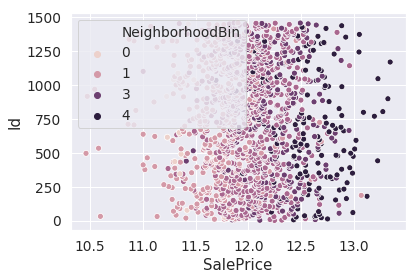

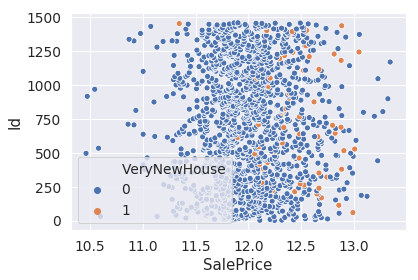

In [50]:

train_NeighbourhoodBin = pd.concat([train_df_munged,train_df],axis=1)

train_NeighbourhoodBin = train_NeighbourhoodBin.loc[:,~train_NeighbourhoodBin.columns.duplicated()]


ax= sns.scatterplot(x="SalePrice", y="Id", hue="NeighborhoodBin",  data=train_NeighbourhoodBin)
plt.show()
a1= sns.scatterplot(x="SalePrice", y="Id", hue="VeryNewHouse",  data=train_NeighbourhoodBin)
plt.show()



<h2>Cell Report:</h2><br>
**1.** The Scatterplot was used to illustrate that both 'NeighborhoodBin' and 'VeryNewHouse' show correlation to 'SalePrice', NeighborhoodBin' more so.<br>


#### 2.2.2 Feature Engineering Vizualization(part 2)

In [ ]:
col = [ 'SalePrice','NeighborhoodBin']
sns.set_style('dark')

sns.pairplot(train_NeighbourhoodBin[col], hue='NeighborhoodBin', palette='gist_heat', dropna=True, size=5)

col = [ 'VeryNewHouse','SalePrice']
sns.set_style('dark')

sns.pairplot(train_NeighbourhoodBin[col], hue='VeryNewHouse', palette='gist_heat', dropna=True, size=5)

col = [ 'IsRegularLotShape','SalePrice']
sns.set_style('dark')

sns.pairplot(train_NeighbourhoodBin[col], hue='IsRegularLotShape', palette='gist_heat', dropna=True, height=5)

col = [ 'IsLandLevel','SalePrice']
sns.set_style('dark')

sns.pairplot(train_NeighbourhoodBin[col], hue='IsLandLevel', palette='gist_heat', dropna=True, height=5)

col = [ 'IsLandSlopeGentle','SalePrice']
sns.set_style('dark')

sns.pairplot(train_NeighbourhoodBin[col], hue='IsLandSlopeGentle', palette='gist_heat', dropna=True, height=5)

col = [ 'IsGarageDetached','SalePrice']
sns.set_style('dark')

sns.pairplot(train_NeighbourhoodBin[col], hue='IsGarageDetached', palette='gist_heat', dropna=True, height=5)

col = [ 'Remodeled','SalePrice']
sns.set_style('dark')

sns.pairplot(train_NeighbourhoodBin[col], hue='Remodeled', palette='gist_heat', dropna=True, height=3)

col = [ 'RecentRemodel','SalePrice']
sns.set_style('dark')

sns.pairplot(train_NeighbourhoodBin[col], hue='RecentRemodel', palette='gist_heat', dropna=True, height=3)

col = [ 'HighSeason','SalePrice']
sns.set_style('dark')

sns.pairplot(train_NeighbourhoodBin[col], hue='HighSeason', palette='gist_heat', dropna=True, height=3)

col = [ 'BoughtOffPlan','SalePrice']
sns.set_style('dark')

sns.pairplot(train_NeighbourhoodBin[col], hue='BoughtOffPlan', palette='gist_heat', dropna=True, height=3)


col = [ 'BadHeating','SalePrice']
sns.set_style('dark')

sns.pairplot(train_NeighbourhoodBin[col], hue='BadHeating', palette='gist_heat', dropna=True, height=3)


col = [ 'SeasonSold','SalePrice']
sns.set_style('dark')

sns.pairplot(train_NeighbourhoodBin[col], hue='SeasonSold', palette='gist_heat', dropna=True, height=3)

col = [ 'YearsSinceRemodel','SalePrice']
sns.set_style('dark')

sns.pairplot(train_NeighbourhoodBin[col], hue='YearsSinceRemodel', palette='gist_heat', dropna=True, height=3)

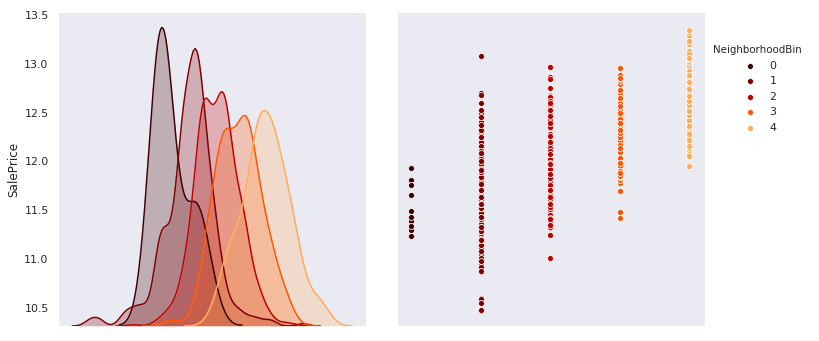
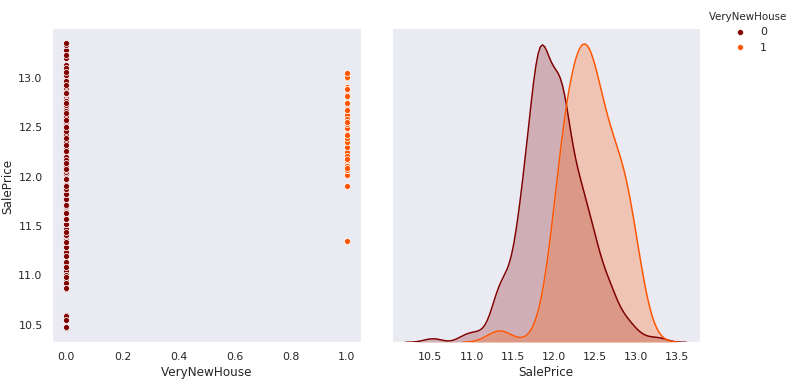
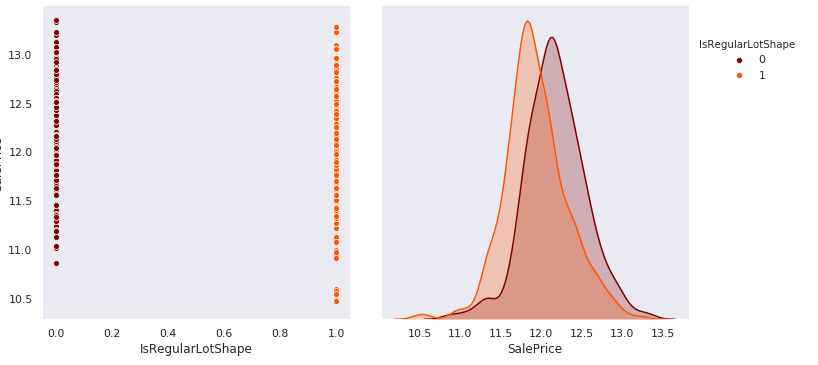

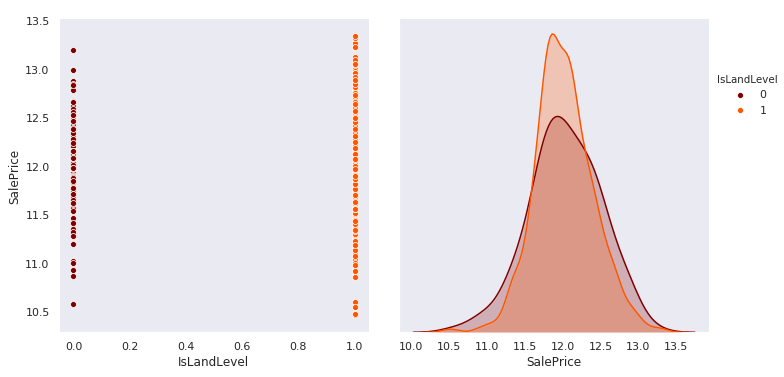
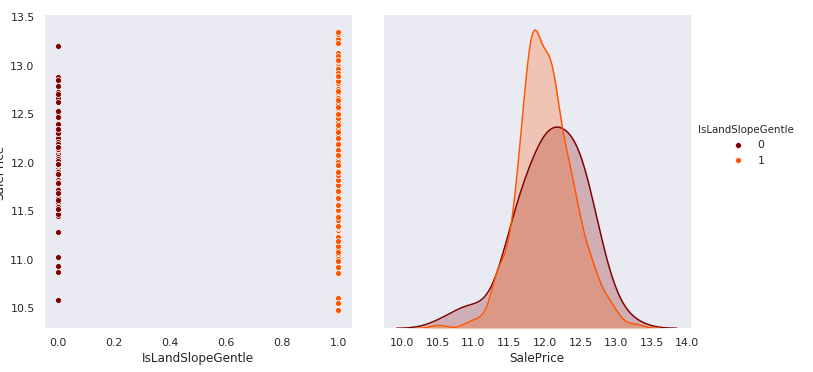

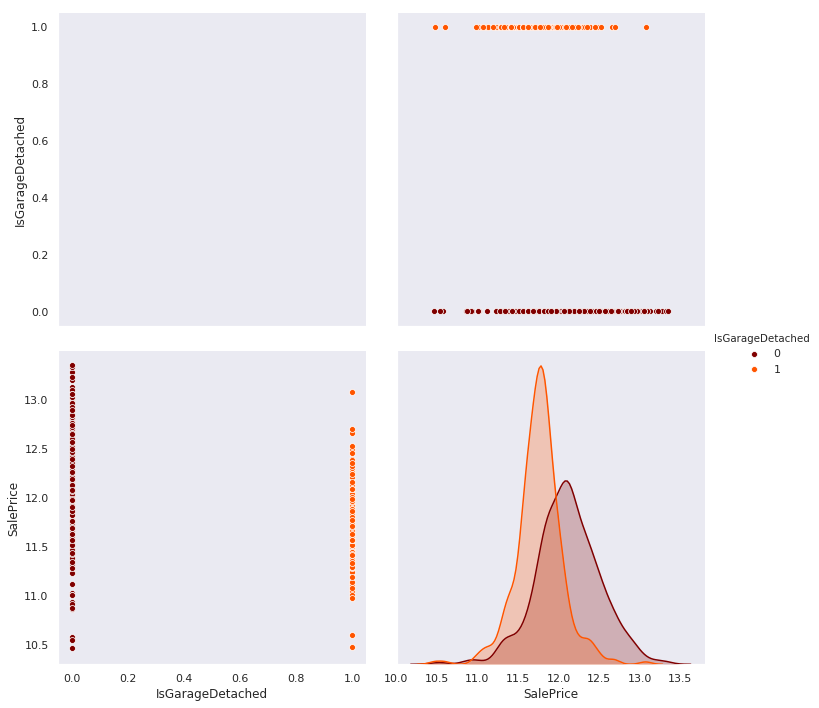

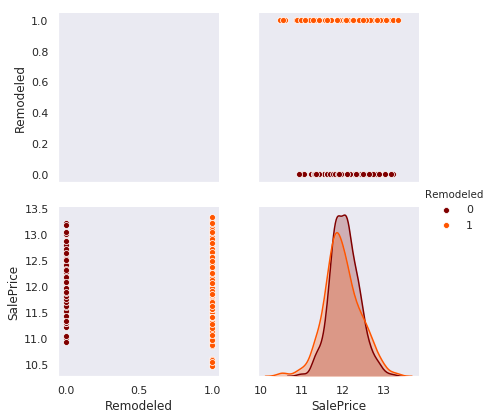

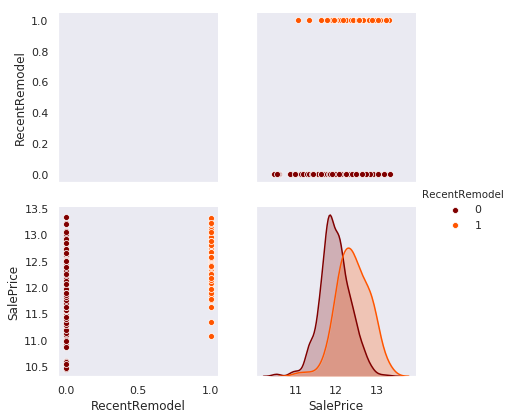

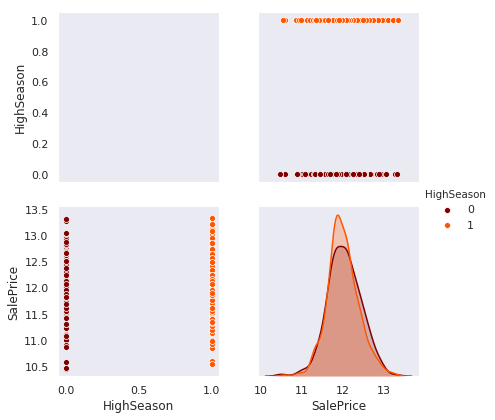

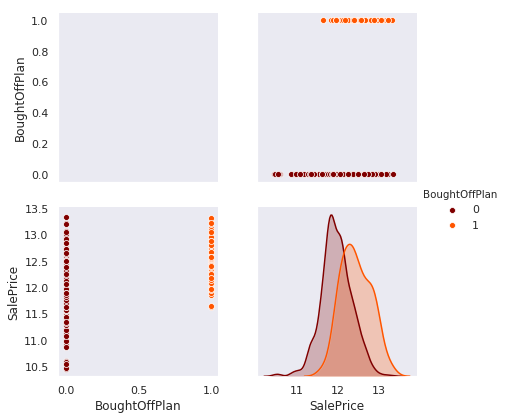

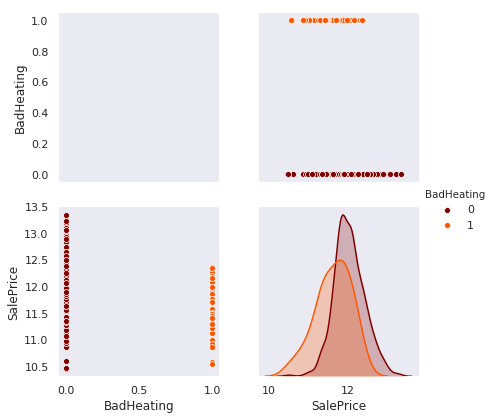

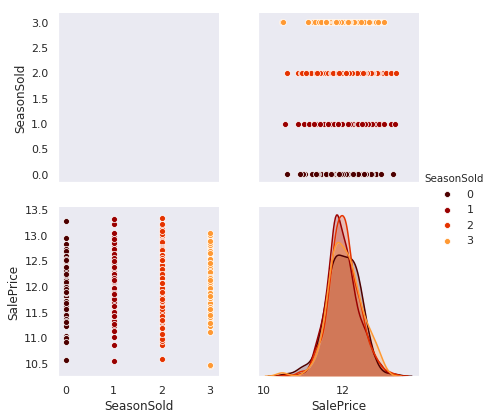

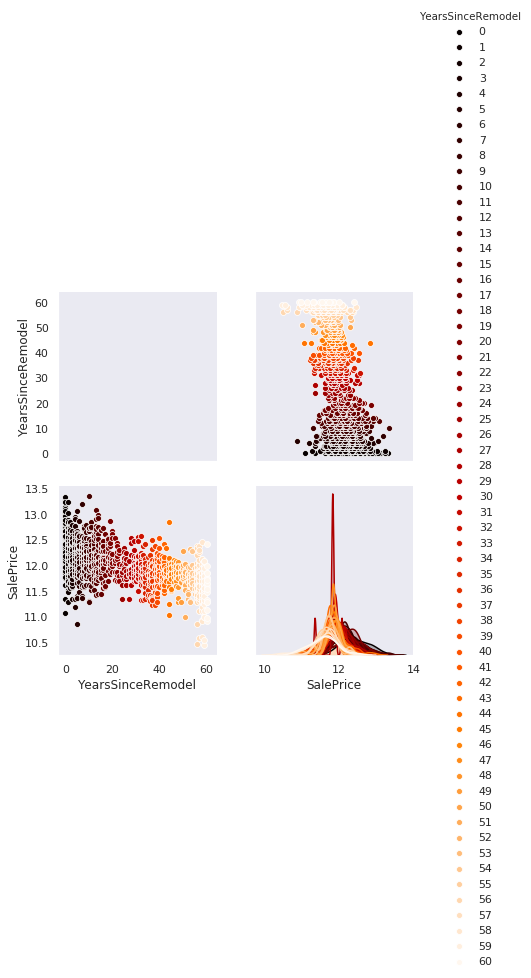

<h2>Cell Report:</h2><br>
**1.** Seaborn Pairplot was used to verify effictiveness of some the engineered features.<br>


#### 2.2.3 Feature Engineering Vizualization(part 3)

In [ ]:
col = ['SalePrice', 'SimplOverallQual', 'SimplOverallCond', 'SimplPoolQC', 'SimplGarageCond', 'SimplGarageQual', 'SimplFireplaceQu', 'SimplFunctional']
sns.set(style='ticks')
sns.set_style('dark')

sns.pairplot(train_NeighbourhoodBin[col], height=3, kind='reg')

#Checking there is any null value or not
plt.figure(figsize=(10, 5))
sns.heatmap(train_df_munged.isnull())
sns.heatmap(test_df_munged.isnull())

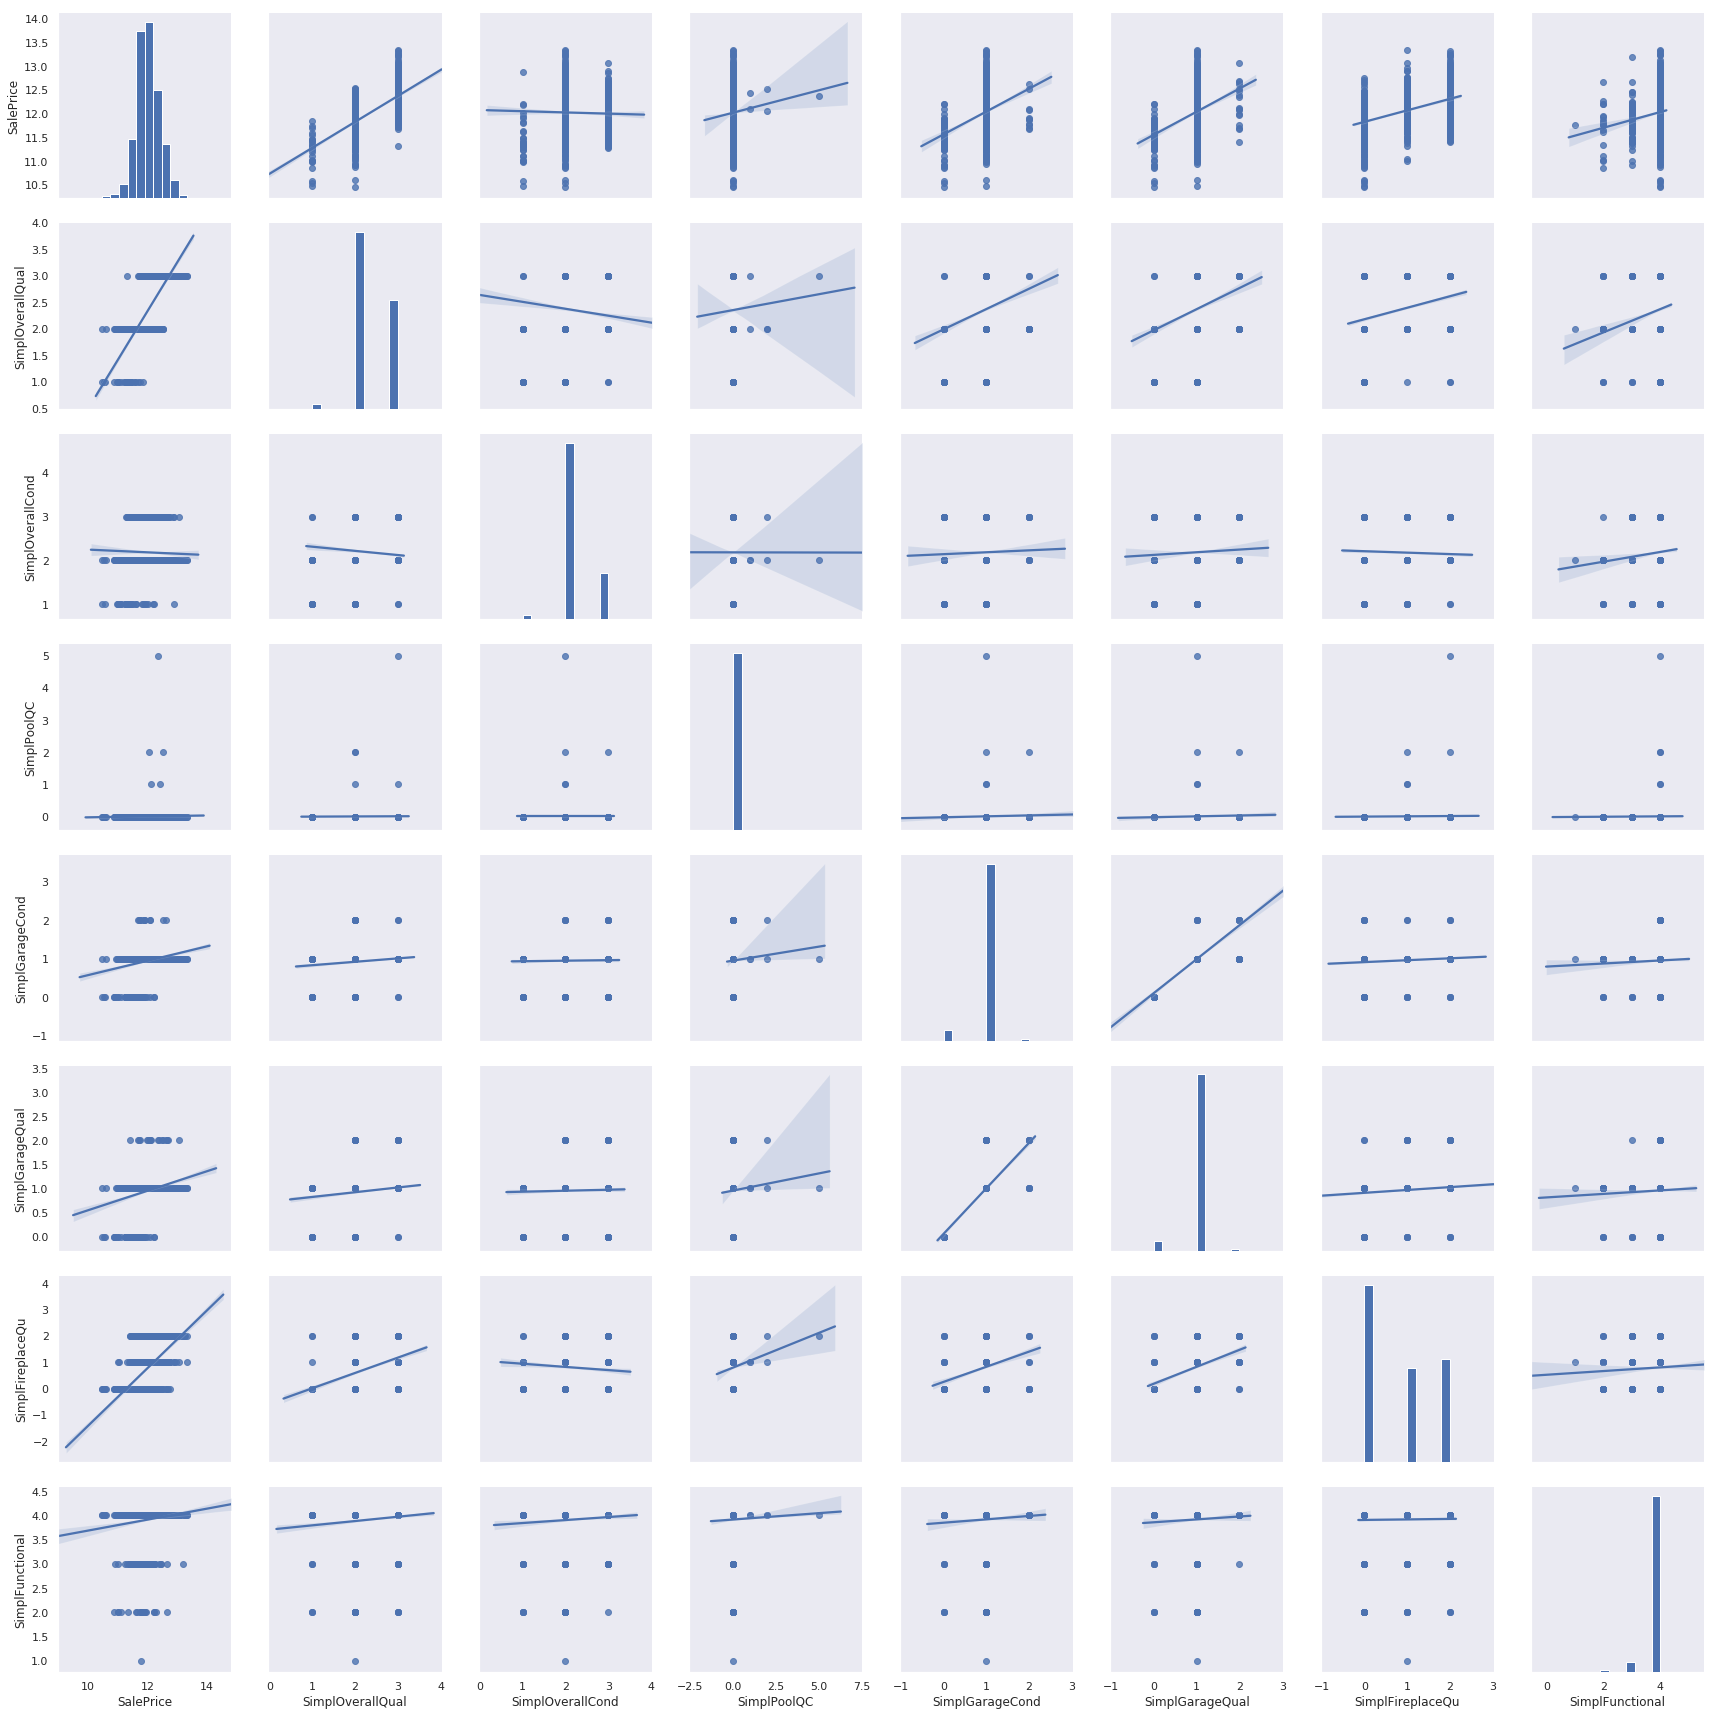

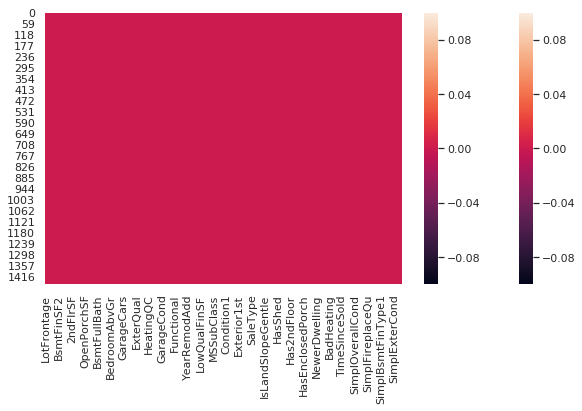

<h2>Cell Report:</h2><br>
**1.** Seaborn Pairplot was used to verify effictiveness of the *Simplified* features.<br>
**2.** Final Null checks were done to make sure there were no *missing values* left.<br>



### 2.3 Skew Fix and Data Normalization

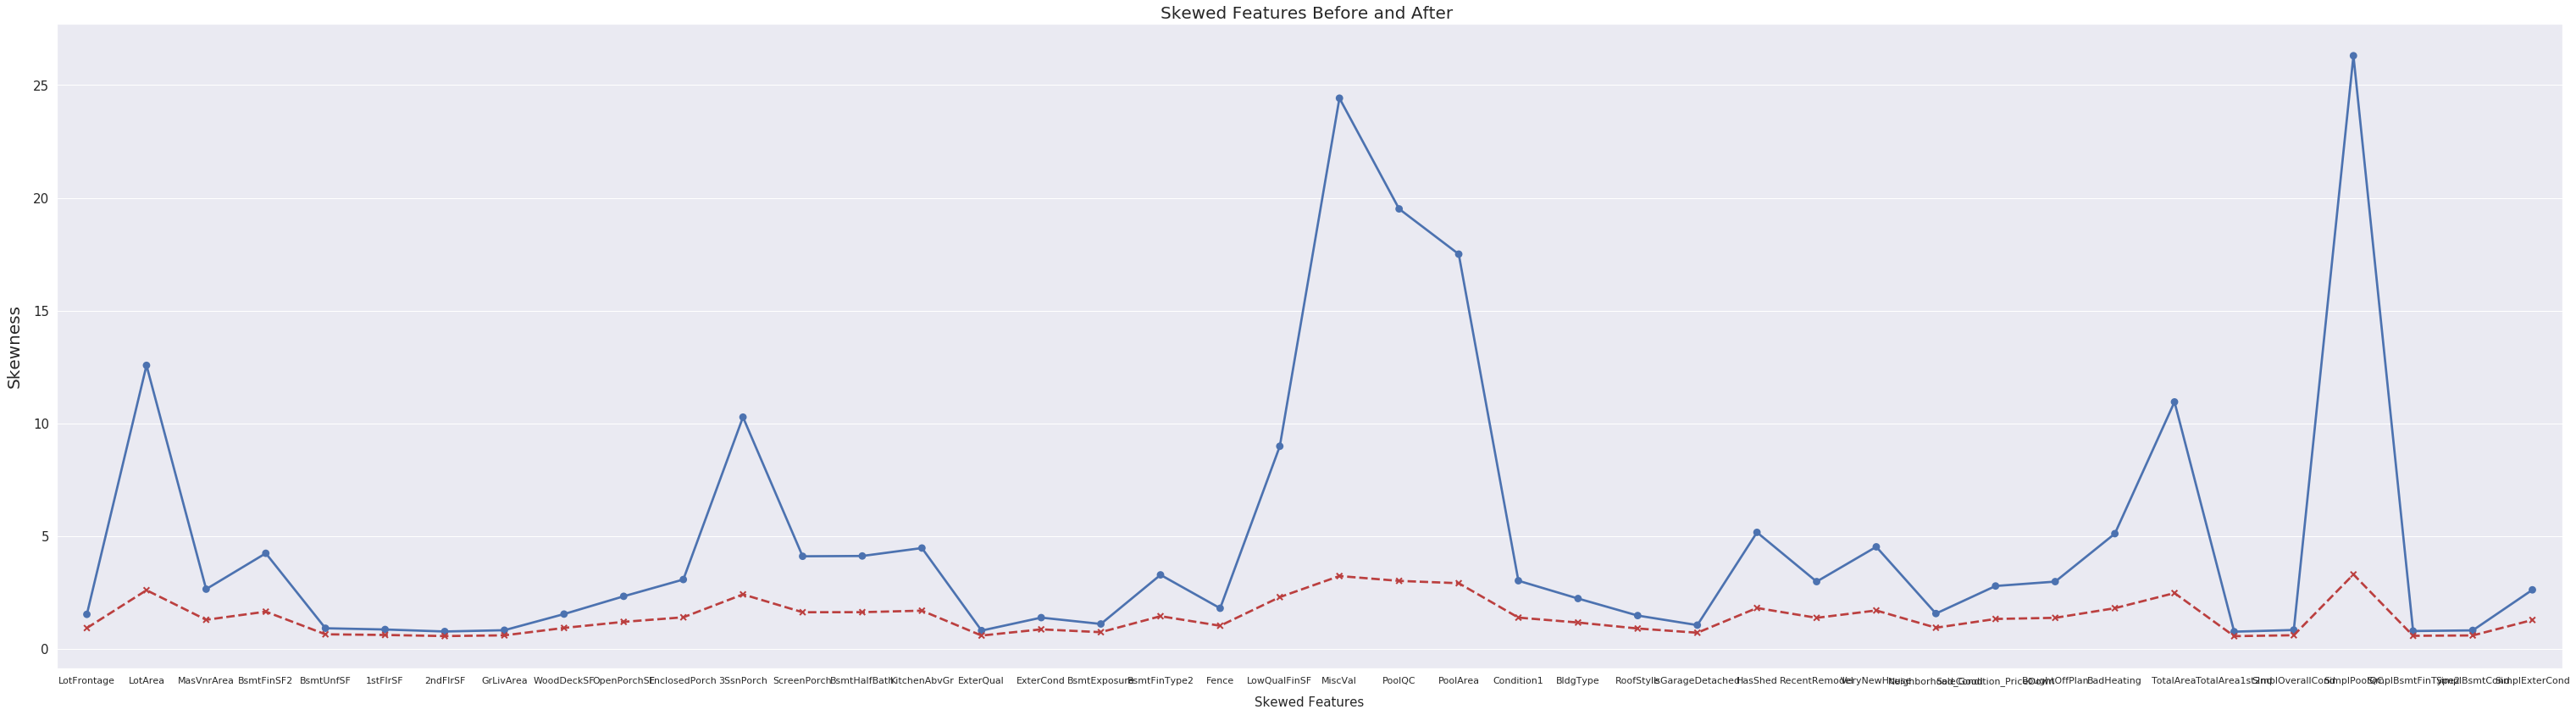

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:48: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.


In [51]:
numeric_features = train_df_munged.dtypes[train_df_munged.dtypes != "object"].index

# Transform the skewed numeric features by taking log(feature + 1).
# This will make the features more normal.
from scipy.stats import skew

skewed = train_df_munged[numeric_features].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[skewed > 0.75]
skewedNParray= skewed
skewed = skewed.index


train_df_munged[skewed] = np.log1p(train_df_munged[skewed])
test_df_munged[skewed] = np.log1p(test_df_munged[skewed])

###
df_skew = pd.DataFrame(index=skewed, columns=['Skew', 'Skew after boxcox1p'])
df_skew['Skew'] = skewedNParray.values
df_skew['Skew after boxcox1p'] = np.log1p(skewedNParray.values)
###

# figure before/after
fig = plt.figure(figsize=(53, 14))

sns.pointplot(x=df_skew.index, y='Skew', data=df_skew, markers=['o'], linestyles=['-'])
sns.pointplot(x=df_skew.index, y='Skew after boxcox1p', data=df_skew, markers=['x'], linestyles=['--'], color='#bb3f3f')

plt.xlabel('Skewed Features', size=15, labelpad=12.5)
plt.ylabel('Skewness', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=11)
plt.tick_params(axis='y', labelsize=15)

plt.title('Skewed Features Before and After ', size=20)

plt.show()


plt.show()
# Additional processing: scale the data.   
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_df_munged[numeric_features])

scaled = scaler.transform(train_df_munged[numeric_features])
for i, col in enumerate(numeric_features):
    train_df_munged[col] = scaled[:, i]

scaled = scaler.transform(test_df_munged[numeric_features])
for i, col in enumerate(numeric_features):
    test_df_munged[col] = scaled[:, i]


<h2>Cell Report:</h2><br>
**1.** Skewed featured were treated with np.log1p function.<br>
**2.** Numerical features were Normalized or work better with Deep Neural Networks and **convergence** is not hindered. [7]<br>

### 2.4 One-hot Encoding

In [52]:
# Convert categorical features using one-hot encoding.
def onehot(onehot_df, df, column_name, fill_na, drop_name):
    onehot_df[column_name] = df[column_name]
    if fill_na is not None:
        onehot_df[column_name].fillna(fill_na, inplace=True)

    dummies = pd.get_dummies(onehot_df[column_name], prefix="_" + column_name)
    
    # Dropping one of the columns actually made the results slightly worse.
    # if drop_name is not None:
    #     dummies.drop(["_" + column_name + "_" + drop_name], axis=1, inplace=True)

    onehot_df = onehot_df.join(dummies)
    onehot_df = onehot_df.drop([column_name], axis=1)
    return onehot_df

def munge_onehot(df):
    onehot_df = pd.DataFrame(index = df.index)

    onehot_df = onehot(onehot_df, df, "MSSubClass", None, "40")
    onehot_df = onehot(onehot_df, df, "MSZoning", "RL", "RH")
    onehot_df = onehot(onehot_df, df, "LotConfig", None, "FR3")
    onehot_df = onehot(onehot_df, df, "Neighborhood", None, "OldTown")
    onehot_df = onehot(onehot_df, df, "Condition1", None, "RRNe")
    onehot_df = onehot(onehot_df, df, "BldgType", None, "2fmCon")
    onehot_df = onehot(onehot_df, df, "HouseStyle", None, "1.5Unf")
    onehot_df = onehot(onehot_df, df, "RoofStyle", None, "Shed")
    onehot_df = onehot(onehot_df, df, "Exterior1st", "VinylSd", "CBlock")
    onehot_df = onehot(onehot_df, df, "Exterior2nd", "VinylSd", "CBlock")
    onehot_df = onehot(onehot_df, df, "Foundation", None, "Wood")
    onehot_df = onehot(onehot_df, df, "SaleType", "WD", "Oth")
    onehot_df = onehot(onehot_df, df, "SaleCondition", "Normal", "AdjLand")

    # Fill in missing MasVnrType for rows that do have a MasVnrArea.
    temp_df = df[["MasVnrType", "MasVnrArea"]].copy()
    idx = (df["MasVnrArea"] != 0) & ((df["MasVnrType"] == "None") | (df["MasVnrType"].isnull()))
    temp_df.loc[idx, "MasVnrType"] = "BrkFace"
    onehot_df = onehot(onehot_df, temp_df, "MasVnrType", "None", "BrkCmn")

    # Also add the booleans from calc_df as dummy variables.
    onehot_df = onehot(onehot_df, df, "LotShape", None, "IR3")
    onehot_df = onehot(onehot_df, df, "LandContour", None, "Low")
    onehot_df = onehot(onehot_df, df, "LandSlope", None, "Sev")
    onehot_df = onehot(onehot_df, df, "Electrical", "SBrkr", "FuseP")
    onehot_df = onehot(onehot_df, df, "GarageType", "None", "CarPort")
    onehot_df = onehot(onehot_df, df, "PavedDrive", None, "P")
    onehot_df = onehot(onehot_df, df, "MiscFeature", "None", "Othr")

    # Features we can probably ignore (but want to include anyway to see
    # if they make any positive difference).
    # Definitely ignoring Utilities: all records are "AllPub", except for
    # one "NoSeWa" in the train set and 2 NA in the test set.
    onehot_df = onehot(onehot_df, df, "Street", None, "Grvl")
    onehot_df = onehot(onehot_df, df, "Alley", "None", "Grvl")
    onehot_df = onehot(onehot_df, df, "Condition2", None, "PosA")
    onehot_df = onehot(onehot_df, df, "RoofMatl", None, "WdShake")
    onehot_df = onehot(onehot_df, df, "Heating", None, "Wall")

    # have these as numerical variables 
    onehot_df = onehot(onehot_df, df, "ExterQual", "None", "Ex")
    onehot_df = onehot(onehot_df, df, "ExterCond", "None", "Ex")
    onehot_df = onehot(onehot_df, df, "BsmtQual", "None", "Ex")
    onehot_df = onehot(onehot_df, df, "BsmtCond", "None", "Ex")
    onehot_df = onehot(onehot_df, df, "HeatingQC", "None", "Ex")
    onehot_df = onehot(onehot_df, df, "KitchenQual", "TA", "Ex")
    onehot_df = onehot(onehot_df, df, "FireplaceQu", "None", "Ex")
    onehot_df = onehot(onehot_df, df, "GarageQual", "None", "Ex")
    onehot_df = onehot(onehot_df, df, "GarageCond", "None", "Ex")
    onehot_df = onehot(onehot_df, df, "PoolQC", "None", "Ex")
    onehot_df = onehot(onehot_df, df, "BsmtExposure", "None", "Gd")
    onehot_df = onehot(onehot_df, df, "BsmtFinType1", "None", "GLQ")
    onehot_df = onehot(onehot_df, df, "BsmtFinType2", "None", "GLQ")
    onehot_df = onehot(onehot_df, df, "Functional", "Typ", "Typ")
    onehot_df = onehot(onehot_df, df, "GarageFinish", "None", "Fin")
    onehot_df = onehot(onehot_df, df, "Fence", "None", "MnPrv")
    onehot_df = onehot(onehot_df, df, "MoSold", None, None)
    
    # Divide up the years between 1871 and 2010 in slices of 20 years.
    year_map = pd.concat(pd.Series("YearBin" + str(i+1), index=range(1871+i*20,1891+i*20)) for i in range(0, 7))

    yearbin_df = pd.DataFrame(index = df.index)
    yearbin_df["GarageYrBltBin"] = df.GarageYrBlt.map(year_map)
    yearbin_df["GarageYrBltBin"].fillna("NoGarage", inplace=True)

    yearbin_df["YearBuiltBin"] = df.YearBuilt.map(year_map)
    yearbin_df["YearRemodAddBin"] = df.YearRemodAdd.map(year_map)
    
    onehot_df = onehot(onehot_df, yearbin_df, "GarageYrBltBin", None, None)
    onehot_df = onehot(onehot_df, yearbin_df, "YearBuiltBin", None, None)
    onehot_df = onehot(onehot_df, yearbin_df, "YearRemodAddBin", None, None)

    return onehot_df

# Add the one-hot encoded categorical features.
onehot_df = munge_onehot(train_df)
onehot_df = onehot(onehot_df, neighborhood_bin_train, "NeighborhoodBin", None, None)
train_df_munged = train_df_munged.join(onehot_df)

<h2>Cell Report:</h2><br>
**1.** One-hot Encoding was done rather than Label Encoding as it gives better accuracy with Deep Neural Networks [9].<br>
**2.** The years were divided between 1871 and 2010 in slices of 20 years.<br>
**3.** Utilities was left out as it was not useful: all records are "AllPub", except for one "NoSeWa" in the train set and 2 NA in the test set.<br>
 


**Feature Dropping (Exclusive Cell)**

In [53]:
# These onehot columns are missing in the test data, so drop them from the
# training data or we might overfit on them.
drop_cols = [
                "_Exterior1st_ImStucc", "_Exterior1st_Stone",
                "_Exterior2nd_Other","_HouseStyle_2.5Fin", 
            
                "_RoofMatl_Membran", "_RoofMatl_Metal", "_RoofMatl_Roll",
                "_Condition2_RRAe", "_Condition2_RRAn", "_Condition2_RRNn",
                "_Heating_Floor", "_Heating_OthW",

                "_Electrical_Mix", 
                "_MiscFeature_TenC",
                "_GarageQual_Ex", "_PoolQC_Fa"
            ]
train_df_munged.drop(drop_cols, axis=1, inplace=True)

onehot_df = munge_onehot(test_df)
onehot_df = onehot(onehot_df, neighborhood_bin_test, "NeighborhoodBin", None, None)
test_df_munged = test_df_munged.join(onehot_df)

# This column is missing in the training data. There is only one example with
# this value in the test set. So just drop it.
test_df_munged.drop(["_MSSubClass_150"], axis=1, inplace=True)

# Drop these columns. They are either not very helpful or they cause overfitting.
drop_cols = [
    "_Condition2_PosN",    # only two are not zero
    "_MSZoning_C (all)",
    "_MSSubClass_160",
]
train_df_munged.drop(drop_cols, axis=1, inplace=True)
test_df_munged.drop(drop_cols, axis=1, inplace=True)


**Note:** These onehot columns are missing in the test data, so drop them from the training data or we might overfit on them.

**Additioncal Data Prep (Exclusive Cell)**

In [54]:

label_df = pd.DataFrame(index = train_df_munged.index, columns=["SalePrice"])
label_df["SalePrice"] = train_df["SalePrice"]
print(list(train_df_munged))
print("Training set size:", train_df_munged.shape)
print("Test set size:", test_df_munged.shape)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'CentralAir', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Functional', 'GarageFinish', 'Fence', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold', 'LowQualFinSF', 'MiscVal', 'PoolQC', 'PoolArea', 'MSSubClass', 'MSZoning', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'SaleType', 'SaleCondition', 'IsRegularLotShape', 'IsLandLevel', 'IsLandSlopeGentle', 'IsElectricalSBrkr', 'IsGarag

** Linear Regression for comparison (Exclusive Cell)**
* Kaggle score was around 0.22(approx.)

In [55]:
train2=munge(train2)
colsLinReg = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 
          'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'MSZoning',  'LotConfig', 'Neighborhood',
        'Condition1',  'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation',  
        'SaleType', 'SaleCondition')

from sklearn.preprocessing import LabelEncoder
for c in colsLinReg:
    lbl = LabelEncoder() 
    lbl.fit(list(train2[c].values)) 
    train2[c] = lbl.transform(list(train2[c].values))

    
#Take their values in X and y
X = train2.values
y = label_df.values

# Split data into train and test formate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# The error metric: RMSE on the log of the sale prices.
from sklearn.metrics import mean_squared_error
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


#Train the model
from sklearn import linear_model
model = linear_model.LinearRegression()

#Fit the model
model.fit(X_train, y_train)

#Prediction
print("Predict value " + str(model.predict([X_test[142]])))
print("Real value " + str(y_test[142]))

#Score/Accuracy
print("Accuracy --> ", model.score(X_test, y_test)*100)

foo=model.predict(X_test)
#Score/Accuracy
print("RMSE --> ", rmse(y_test, foo))


Predict value [[12.06554692]]
Real value [12.06681633]
Accuracy -->  88.08908165564657
RMSE -->  0.1371500049418401


**Batch Normalization and shuffled Batch Generator Functions(Exclusive Cell)**

In [56]:
#change directory
os.chdir("/kaggle/working/")
import tensorflow as tf

def bn_layer(x, scope, is_training, epsilon=0.001, decay=0.99, reuse=None):
    """
    Performs a batch normalization layer

    Args:
        x: input tensor
        scope: scope name
        is_training: python boolean value
        epsilon: the variance epsilon - a small float number to avoid dividing by 0
        decay: the moving average decay

    Returns:
        The ops of a batch normalization layer
    """
    with tf.variable_scope(scope, reuse=reuse):
        shape = x.get_shape().as_list()
        # gamma: a trainable scale factor
        gamma = tf.get_variable("gamma", shape[-1], initializer=tf.constant_initializer(1.0), trainable=True)
        # beta: a trainable shift value
        beta = tf.get_variable("beta", shape[-1], initializer=tf.constant_initializer(0.0), trainable=True)
        moving_avg = tf.get_variable("moving_avg", shape[-1], initializer=tf.constant_initializer(0.0), trainable=False)
        moving_var = tf.get_variable("moving_var", shape[-1], initializer=tf.constant_initializer(1.0), trainable=False)
        if is_training:
            # tf.nn.moments == Calculate the mean and the variance of the tensor x
            avg, var = tf.nn.moments(x, np.arange(len(shape)-1), keep_dims=True)
            avg=tf.reshape(avg, [avg.shape.as_list()[-1]])
            var=tf.reshape(var, [var.shape.as_list()[-1]])
            #update_moving_avg = moving_averages.assign_moving_average(moving_avg, avg, decay)
            update_moving_avg=tf.assign(moving_avg, moving_avg*decay+avg*(1-decay))
            #update_moving_var = moving_averages.assign_moving_average(moving_var, var, decay)
            update_moving_var=tf.assign(moving_var, moving_var*decay+var*(1-decay))
            control_inputs = [update_moving_avg, update_moving_var]
        else:
            avg = moving_avg
            var = moving_var
            control_inputs = []
        with tf.control_dependencies(control_inputs):
            output = tf.nn.batch_normalization(x, avg, var, offset=beta, scale=gamma, variance_epsilon=epsilon)

    return output


def bn_layer_top(x, scope, is_training, epsilon=0.001, decay=0.99):
    """
    Returns a batch normalization layer that automatically switch between train and test phases based on the 
    tensor is_training

    Args:
        x: input tensor
        scope: scope name
        is_training: boolean tensor or variable
        epsilon: epsilon parameter - see batch_norm_layer
        decay: epsilon parameter - see batch_norm_layer

    Returns:
        The correct batch normalization layer based on the value of is_training
    """
    #assert isinstance(is_training, (ops.Tensor, variables.Variable)) and is_training.dtype == tf.bool

    return tf.cond(
        is_training,
        lambda: bn_layer(x=x, scope=scope, epsilon=epsilon, decay=decay, is_training=True, reuse=None),
        lambda: bn_layer(x=x, scope=scope, epsilon=epsilon, decay=decay, is_training=False, reuse=True),
    )




**Note**: It is advantegeous to use batch normalization as our TensorFlow NN model uses mini fixed length randomized batches iterated over a fixed number of epochs. Batch normalization helps keep the data standardised over epochs. Code is from Zhongyu Kuang [10] [11].

## 3. Decision of Algorithm and Model

In [57]:
#Lets split the data into train and test set
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_df_munged, label_df, test_size=0.30, random_state=2)

ntrain = X_train.shape[0]
nval=X_val.shape[0]

y_trainRanked= y_train.values
y_valRanked= y_val.values
y_trainRanked=np.reshape(y_trainRanked, (ntrain, 1))
y_valRanked=np.reshape(y_valRanked, (nval, 1))

X_testRanked= test_df_munged.values
test1X=X_testRanked

X_trainRanked= X_train.values
X_valRanked= X_val.values

def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

yShape=y_trainRanked.shape
XShape=X_trainRanked.shape
print(XShape)
print(y_trainRanked.shape)
print(y_trainRanked[2])

(1019, 403)
(1019, 1)
[12.20607765]


<h2>Cell Report:</h2><br>
**1.** Train dataset was spit 70-30 in order to do Cross Validation.<br>
**2.** The *next_batch* function returns a randomly shuffled batch. This was needed as Mini-batch Training was used across all the DNNs.<br>


### 3.1 DNN 1

In [ ]:

lossArr =  np.array([])
accArr= np.array([])
val_lossArr =  np.array([])
val_accArr= np.array([])

epochArr=  np.array([])
pred_500X300_kp90 = pd.DataFrame()
pred_500X300_kp90['Id']= train_df['Id']



# Python optimisation variables
learning_rate = 0.001
epochs = 4000
batch_size = 80

#Reset TF graph
tf.reset_default_graph()


# placeholders for a tensor that will be always fed.
X = tf.placeholder(dtype=tf.float32, shape = [None, 403])
Y = tf.placeholder(dtype=tf.float32, shape = [None, 1])
keep_prob = tf.placeholder(tf.float32)
is_training = tf.placeholder(tf.bool)

# Training Data
n_samples = y_trainRanked.shape[0]

# # Set model weights

# # the weights connecting the input to the hidden layer


W1 = tf.Variable(tf.ones([403, 500]), name='W1',dtype=tf.float32)
b1 = tf.Variable(tf.zeros([500]), name='b1',dtype=tf.float32)

# and the weights connecting the hidden layer to the output layer
W2 = tf.Variable(tf.ones([500, 300]), name='W2',dtype=tf.float32)
b2 = tf.Variable(tf.zeros([300]), name='b2',dtype=tf.float32)

# and the weights connecting the hidden layer to the output layer
W3 = tf.Variable(tf.ones([300, 1]), name='W3',dtype=tf.float32)
b3 = tf.Variable(tf.zeros([1]), name='b3',dtype=tf.float32)



# calculate the output of the hidden layer
hidden_out = tf.add(tf.matmul(X, W1), b1)
hidden_out = bn_layer_top(hidden_out,'hidden_out_bn', is_training=is_training)
hidden_out = tf.nn.relu(hidden_out)
drop_out = tf.nn.dropout(hidden_out, keep_prob)  # DROP-OUT here

# calculate the output of the hidden layer 2
hidden_out2 = tf.add(tf.matmul(drop_out, W2), b2)
hidden_out2 = bn_layer_top(hidden_out2,'hidden_out_bn2', is_training=is_training)
hidden_out2 = tf.nn.relu(hidden_out2)
drop_out2 = tf.nn.dropout(hidden_out2, keep_prob)  # DROP-OUT here

#Prediction

pred = tf.add(tf.matmul(drop_out2, W3), b3)




 # Define a loss function
deltas = tf.abs(pred - Y)
loss = tf.reduce_sum(deltas)/batch_size





#  Note, minimize() knows to modify W and b because Variable objects are               trainable=True by default
optimiser = tf.train.AdamOptimizer(learning_rate).minimize(loss) 





# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training

# start the session
with tf.Session() as sess:
    # initialise the variables
    sess.run(init)
    total_batch = int(len(X_trainRanked) / batch_size)
    val_total_batch = int(len(X_valRanked) / batch_size)

    for epoch in range(epochs):
        avg_cost = 0
        avg_acc = 0
        avg_val_cost = 0
        avg_val_acc = 0
        for i in range(total_batch):
            batch_x, batch_y = next_batch(num=batch_size,data=X_trainRanked,labels=y_trainRanked)
            _, c = sess.run([optimiser, loss], 
                         feed_dict={X: batch_x, Y: batch_y, keep_prob : 0.90, is_training: True},)
            train_pred=sess.run(pred, feed_dict={X: batch_x,keep_prob : 1.0, is_training: False})
            c= rmse(batch_y,train_pred)
            a= r2_score(batch_y, train_pred,multioutput='variance_weighted')
            avg_cost += c / total_batch
            avg_acc += a / total_batch
        

        val_pred=sess.run(pred, feed_dict={X: X_valRanked,keep_prob : 1.0, is_training: False})
        val_c= rmse(y_valRanked,val_pred)
        val_a= r2_score(y_valRanked, val_pred,multioutput='variance_weighted')
        avg_val_cost = val_c
        avg_val_acc = val_a 
        print("Epoch:", (epoch + 1), "cost =", "{:.3f}".format(avg_cost))
        lossArr = np.append (lossArr, [avg_cost])
        accArr= np.append (accArr, [avg_acc])
        val_lossArr = np.append (val_lossArr, [avg_val_cost])
        val_accArr= np.append (val_accArr, [avg_val_acc])
        epochArr= np.append (epochArr, [epoch])
       
    
    
    #Predict for Evaluation 
    pred_500X300_kp90['SalePrice'] = sess.run(pred, feed_dict={X: train_df_munged,keep_prob : 1.0, is_training: False})

       
    
def lcurves(ylim_loss_start=0.000,ylim_loss_end=0.200,ylim_acc_start=0.8000,ylim_acc_end=1.0000):
    from scipy.interpolate import make_interp_spline, BSpline

    # Train and validation loss
    xnew = np.linspace(epochArr.min(),epochArr.max(),50) #300 represents number of points to make between T.min and T.max
    spl = make_interp_spline(epochArr, lossArr, k=3) #BSpline object
    val_spl = make_interp_spline(epochArr, val_lossArr, k=3) #BSpline object
    power_smooth = spl(xnew)
    val_power_smooth = val_spl(xnew)
    plt.ylim(ylim_loss_start,ylim_loss_end)
    plt.plot(xnew,power_smooth, 'b', label='Training loss')
    plt.plot(xnew,val_power_smooth, 'r', label='Validation loss')
    plt.title('Training and Validation loss')
    plt.legend()
    plt.show()
    # Train and validation acc
    spl = make_interp_spline(epochArr, accArr, k=3) #BSpline object
    val_spl = make_interp_spline(epochArr, val_accArr, k=3) #BSpline object
    power_smooth = spl(xnew)
    val_power_smooth = val_spl(xnew)
    plt.ylim(ylim_acc_start,ylim_acc_end)
    plt.plot(xnew,power_smooth, 'b', label='Training accuracy')
    plt.plot(xnew,val_power_smooth, 'r', label='Validation accuracy')
    plt.title('Training and Validation accuracy')
    plt.legend()
    plt.show()
    
lcurves()


    

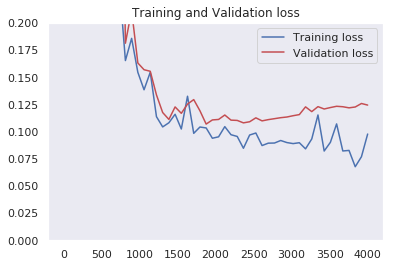
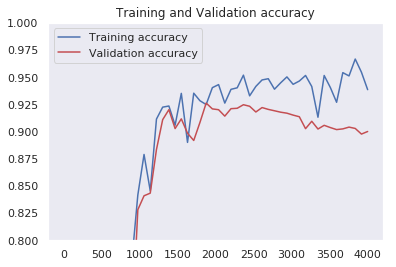


<h2>Cell Report:</h2><br>
**1.** This NN consists of Input layer->500 Neurons->300 Neurons->Single Output Neuron.<br>
**2.** *Keep_prob* of Dropout is set to 0.90<br>
**3.** A Learning Curve is also generated that will be discussed further on.<br>


### 3.2 DNN 2

In [ ]:

lossArr =  np.array([])
accArr= np.array([])
val_lossArr =  np.array([])
val_accArr= np.array([])

epochArr=  np.array([])
pred_200X200_kp90 = pd.DataFrame()
pred_200X200_kp90['Id']= train_df['Id']



# Python optimisation variables
learning_rate = 0.001
epochs = 4000
batch_size = 80

#Reset TF graph
tf.reset_default_graph()


# placeholders for a tensor that will be always fed.
X = tf.placeholder(dtype=tf.float32, shape = [None, 403])
Y = tf.placeholder(dtype=tf.float32, shape = [None, 1])
keep_prob = tf.placeholder(tf.float32)
is_training = tf.placeholder(tf.bool)

# Training Data
n_samples = y_trainRanked.shape[0]

# # Set model weights

# # the weights connecting the input to the hidden layer


W1 = tf.Variable(tf.ones([403, 200]), name='W1',dtype=tf.float32)
b1 = tf.Variable(tf.zeros([200]), name='b1',dtype=tf.float32)

# and the weights connecting the hidden layer to the output layer
W2 = tf.Variable(tf.ones([200, 200]), name='W2',dtype=tf.float32)
b2 = tf.Variable(tf.zeros([200]), name='b2',dtype=tf.float32)

# and the weights connecting the hidden layer to the output layer
W3 = tf.Variable(tf.ones([200, 1]), name='W3',dtype=tf.float32)
b3 = tf.Variable(tf.zeros([1]), name='b3',dtype=tf.float32)



# calculate the output of the hidden layer
hidden_out = tf.add(tf.matmul(X, W1), b1)
hidden_out = bn_layer_top(hidden_out,'hidden_out_bn', is_training=is_training)
hidden_out = tf.nn.relu(hidden_out)
drop_out = tf.nn.dropout(hidden_out, keep_prob)  # DROP-OUT here

# calculate the output of the hidden layer 2
hidden_out2 = tf.add(tf.matmul(drop_out, W2), b2)
hidden_out2 = bn_layer_top(hidden_out2,'hidden_out_bn2', is_training=is_training)
hidden_out2 = tf.nn.relu(hidden_out2)
drop_out2 = tf.nn.dropout(hidden_out2, keep_prob)  # DROP-OUT here

#Prediction

pred = tf.add(tf.matmul(drop_out2, W3), b3)




 # Define a loss function
deltas = tf.abs(pred - Y)
loss = tf.reduce_sum(deltas)/batch_size





#  Note, minimize() knows to modify W and b because Variable objects are               trainable=True by default
optimiser = tf.train.AdamOptimizer(learning_rate).minimize(loss) 





# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training

# start the session
with tf.Session() as sess:
    # initialise the variables
    sess.run(init)
    total_batch = int(len(X_trainRanked) / batch_size)
    val_total_batch = int(len(X_valRanked) / batch_size)

    for epoch in range(epochs):
        avg_cost = 0
        avg_acc = 0
        avg_val_cost = 0
        avg_val_acc = 0
        for i in range(total_batch):
            batch_x, batch_y = next_batch(num=batch_size,data=X_trainRanked,labels=y_trainRanked)
            _, c = sess.run([optimiser, loss], 
                         feed_dict={X: batch_x, Y: batch_y, keep_prob : 0.90, is_training: True},)
            train_pred=sess.run(pred, feed_dict={X: batch_x,keep_prob : 1.0, is_training: False})
            c= rmse(batch_y,train_pred)
            a= r2_score(batch_y, train_pred, multioutput='variance_weighted')
            avg_cost += c / total_batch
            avg_acc += a / total_batch
        
            
        val_pred=sess.run(pred, feed_dict={X: X_valRanked,keep_prob : 1.0, is_training: False})
        val_c= rmse(y_valRanked,val_pred)
        val_a= r2_score(y_valRanked, val_pred, multioutput='variance_weighted')
        avg_val_cost = val_c
        avg_val_acc = val_a 
        print("Epoch:", (epoch + 1), "cost =", "{:.3f}".format(avg_cost))
        lossArr = np.append (lossArr, [avg_cost])
        accArr= np.append (accArr, [avg_acc])
        val_lossArr = np.append (val_lossArr, [avg_val_cost])
        val_accArr= np.append (val_accArr, [avg_val_acc])
        epochArr= np.append (epochArr, [epoch])
       
    
    
    #Predict for Evaluation 
    pred_200X200_kp90['SalePrice'] = sess.run(pred, feed_dict={X: train_df_munged,keep_prob : 1.0, is_training: False})

       
    

lcurves()  

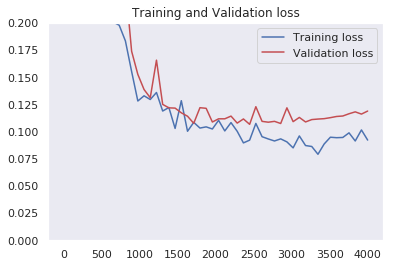
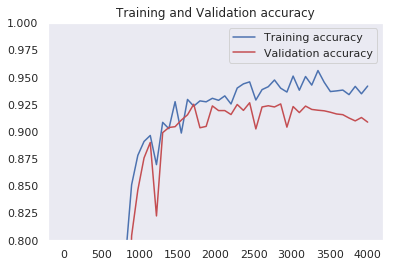

<h2>Cell Report:</h2><br>
**1.** This NN consists of Input layer->200 Neurons->200 Neurons->Single Output Neuron.<br>
**2.** *Keep_prob* of Dropout is set to 0.90<br>
**3.** A Learning Curve is also generated that will be discussed further on.<br>


### 3.3 DNN 3

In [ ]:

lossArr =  np.array([])
accArr= np.array([])
val_lossArr =  np.array([])
val_accArr= np.array([])

epochArr=  np.array([])
pred_50X50_kp90 = pd.DataFrame()
pred_50X50_kp90['Id']= train_df['Id']



# Python optimisation variables
learning_rate = 0.001
epochs = 4000
batch_size = 80

#Reset TF graph
tf.reset_default_graph()


# placeholders for a tensor that will be always fed.
X = tf.placeholder(dtype=tf.float32, shape = [None, 403])
Y = tf.placeholder(dtype=tf.float32, shape = [None, 1])
keep_prob = tf.placeholder(tf.float32)
is_training = tf.placeholder(tf.bool)

# Training Data
n_samples = y_trainRanked.shape[0]

# # Set model weights

# # the weights connecting the input to the hidden layer


W1 = tf.Variable(tf.ones([403, 50]), name='W1',dtype=tf.float32)
b1 = tf.Variable(tf.zeros([50]), name='b1',dtype=tf.float32)

# and the weights connecting the hidden layer to the output layer
W2 = tf.Variable(tf.ones([50, 50]), name='W2',dtype=tf.float32)
b2 = tf.Variable(tf.zeros([50]), name='b2',dtype=tf.float32)

# and the weights connecting the hidden layer to the output layer
W3 = tf.Variable(tf.ones([50, 1]), name='W3',dtype=tf.float32)
b3 = tf.Variable(tf.zeros([1]), name='b3',dtype=tf.float32)



# calculate the output of the hidden layer
hidden_out = tf.add(tf.matmul(X, W1), b1)
hidden_out = bn_layer_top(hidden_out,'hidden_out_bn', is_training=is_training)
hidden_out = tf.nn.relu(hidden_out)
drop_out = tf.nn.dropout(hidden_out, keep_prob)  # DROP-OUT here

# calculate the output of the hidden layer 2
hidden_out2 = tf.add(tf.matmul(drop_out, W2), b2)
hidden_out2 = bn_layer_top(hidden_out2,'hidden_out_bn2', is_training=is_training)
hidden_out2 = tf.nn.relu(hidden_out2)
drop_out2 = tf.nn.dropout(hidden_out2, keep_prob)  # DROP-OUT here

#Prediction

pred = tf.add(tf.matmul(drop_out2, W3), b3)




 # Define a loss function
deltas = tf.abs(pred - Y)
loss = tf.reduce_sum(deltas)/batch_size





#  Note, minimize() knows to modify W and b because Variable objects are               trainable=True by default
optimiser = tf.train.AdamOptimizer(learning_rate).minimize(loss) 





# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training

# start the session
with tf.Session() as sess:
    # initialise the variables
    sess.run(init)
    total_batch = int(len(X_trainRanked) / batch_size)
    val_total_batch = int(len(X_valRanked) / batch_size)

    for epoch in range(epochs):
        avg_cost = 0
        avg_acc = 0
        avg_val_cost = 0
        avg_val_acc = 0
        for i in range(total_batch):
            batch_x, batch_y = next_batch(num=batch_size,data=X_trainRanked,labels=y_trainRanked)
            _, c = sess.run([optimiser, loss], 
                         feed_dict={X: batch_x, Y: batch_y, keep_prob : 0.90, is_training: True},)
            train_pred=sess.run(pred, feed_dict={X: batch_x,keep_prob : 1.0, is_training: False})
            c= rmse(batch_y,train_pred)
            a= r2_score(batch_y, train_pred, multioutput='variance_weighted')
            avg_cost += c / total_batch
            avg_acc += a / total_batch
        
            
        val_pred=sess.run(pred, feed_dict={X: X_valRanked,keep_prob : 1.0, is_training: False})
        val_c= rmse(y_valRanked,val_pred)
        val_a= r2_score(y_valRanked, val_pred, multioutput='variance_weighted')
        avg_val_cost = val_c
        avg_val_acc = val_a 
        print("Epoch:", (epoch + 1), "cost =", "{:.3f}".format(avg_cost))
        lossArr = np.append (lossArr, [avg_cost])
        accArr= np.append (accArr, [avg_acc])
        val_lossArr = np.append (val_lossArr, [avg_val_cost])
        val_accArr= np.append (val_accArr, [avg_val_acc])
        epochArr= np.append (epochArr, [epoch])
       
    
    
    #Predict for Evaluation 
    pred_50X50_kp90['SalePrice'] = sess.run(pred, feed_dict={X: train_df_munged,keep_prob : 1.0, is_training: False})

       
    

lcurves()    

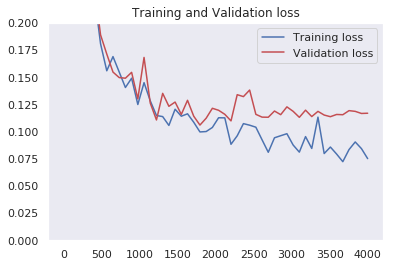
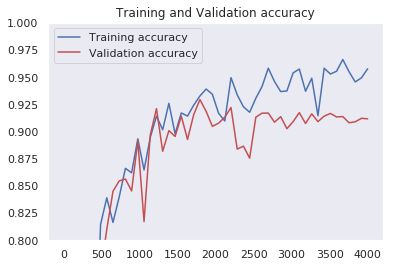

<h2>Cell Report:</h2><br>
**1.** This NN consists of Input layer->50 Neurons->50 Neurons->Single Output Neuron.<br>
**2.** *Keep_prob* of Dropout is set to 0.90<br>
**3.** A Learning Curve is also generated that will be discussed further on.<br>


### 3.4 DNN 4

In [ ]:

lossArr =  np.array([])
accArr= np.array([])
val_lossArr =  np.array([])
val_accArr= np.array([])

epochArr=  np.array([])
pred_500_kp90 = pd.DataFrame()
pred_500_kp90['Id']= train_df['Id']



# Python optimisation variables
learning_rate = 0.001
epochs = 4000
batch_size = 80

#Reset TF graph
tf.reset_default_graph()


# placeholders for a tensor that will be always fed.
X = tf.placeholder(dtype=tf.float32, shape = [None, 403])
Y = tf.placeholder(dtype=tf.float32, shape = [None, 1])
keep_prob = tf.placeholder(tf.float32)
is_training = tf.placeholder(tf.bool)

# Training Data
n_samples = y_trainRanked.shape[0]

# # Set model weights

# # the weights connecting the input to the hidden layer


W1 = tf.Variable(tf.ones([403, 500]), name='W1',dtype=tf.float32)
b1 = tf.Variable(tf.zeros([500]), name='b1',dtype=tf.float32)

# and the weights connecting the hidden layer to the output layer
W2 = tf.Variable(tf.ones([500, 1]), name='W2',dtype=tf.float32)
b2 = tf.Variable(tf.zeros([1]), name='b2',dtype=tf.float32)


# calculate the output of the hidden layer
hidden_out = tf.add(tf.matmul(X, W1), b1)
hidden_out = bn_layer_top(hidden_out,'hidden_out_bn', is_training=is_training)
hidden_out = tf.nn.relu(hidden_out)
drop_out = tf.nn.dropout(hidden_out, keep_prob)  # DROP-OUT here



#Prediction

pred = tf.add(tf.matmul(drop_out, W2), b2)




 # Define a loss function
deltas = tf.abs(pred - Y)
loss = tf.reduce_sum(deltas)/batch_size





#  Note, minimize() knows to modify W and b because Variable objects are               trainable=True by default
optimiser = tf.train.AdamOptimizer(learning_rate).minimize(loss) 





# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training

# start the session
with tf.Session() as sess:
    # initialise the variables
    sess.run(init)
    total_batch = int(len(X_trainRanked) / batch_size)
    val_total_batch = int(len(X_valRanked) / batch_size)

    for epoch in range(epochs):
        avg_cost = 0
        avg_acc = 0
        avg_val_cost = 0
        avg_val_acc = 0
        for i in range(total_batch):
            batch_x, batch_y = next_batch(num=batch_size,data=X_trainRanked,labels=y_trainRanked)
            _, c = sess.run([optimiser, loss], 
                         feed_dict={X: batch_x, Y: batch_y, keep_prob : 0.90, is_training: True},)
            train_pred=sess.run(pred, feed_dict={X: batch_x,keep_prob : 1.0, is_training: False})
            c= rmse(batch_y,train_pred)
            a= r2_score(batch_y, train_pred, multioutput='variance_weighted')
            avg_cost += c / total_batch
            avg_acc += a / total_batch
        
            
        val_pred=sess.run(pred, feed_dict={X: X_valRanked,keep_prob : 1.0, is_training: False})
        val_c= rmse(y_valRanked,val_pred)
        val_a= r2_score(y_valRanked, val_pred, multioutput='variance_weighted')
        avg_val_cost = val_c
        avg_val_acc = val_a 
        print("Epoch:", (epoch + 1), "cost =", "{:.3f}".format(avg_cost))
        lossArr = np.append (lossArr, [avg_cost])
        accArr= np.append (accArr, [avg_acc])
        val_lossArr = np.append (val_lossArr, [avg_val_cost])
        val_accArr= np.append (val_accArr, [avg_val_acc])
        epochArr= np.append (epochArr, [epoch])
       
    
    
    #Predict for Evaluation 
    pred_500_kp90['SalePrice'] = sess.run(pred, feed_dict={X: train_df_munged,keep_prob : 1.0, is_training: False})

       
    

lcurves(20,100,-100,100)    

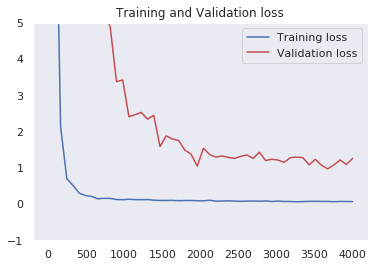
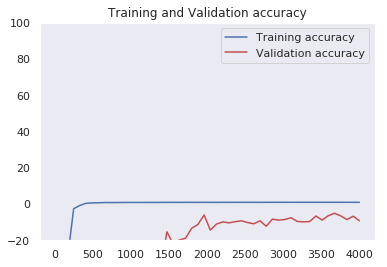

<h2>Cell Report:</h2><br>
**1.** This shallow NN consists of Input layer->500 Neurons->Single Output Neuron.<br>
**2.** *Keep_prob* of Dropout is set to 0.90<br>
**3.** A Learning Curve is also generated that will be discussed further on.<br>


### 3.5 DNN 5

In [ ]:

lossArr =  np.array([])
accArr= np.array([])
val_lossArr =  np.array([])
val_accArr= np.array([])

epochArr=  np.array([])
pred_500X300_kp50 = pd.DataFrame()
pred_500X300_kp50['Id']= train_df['Id']



# Python optimisation variables
learning_rate = 0.001
epochs = 4000
batch_size = 80

#Reset TF graph
tf.reset_default_graph()


# placeholders for a tensor that will be always fed.
X = tf.placeholder(dtype=tf.float32, shape = [None, 403])
Y = tf.placeholder(dtype=tf.float32, shape = [None, 1])
keep_prob = tf.placeholder(tf.float32)
is_training = tf.placeholder(tf.bool)

# Training Data
n_samples = y_trainRanked.shape[0]

# # Set model weights

# # the weights connecting the input to the hidden layer


W1 = tf.Variable(tf.ones([403, 500]), name='W1',dtype=tf.float32)
b1 = tf.Variable(tf.zeros([500]), name='b1',dtype=tf.float32)

# and the weights connecting the hidden layer to the output layer
W2 = tf.Variable(tf.ones([500, 300]), name='W2',dtype=tf.float32)
b2 = tf.Variable(tf.zeros([300]), name='b2',dtype=tf.float32)

# and the weights connecting the hidden layer to the output layer
W3 = tf.Variable(tf.ones([300, 1]), name='W3',dtype=tf.float32)
b3 = tf.Variable(tf.zeros([1]), name='b3',dtype=tf.float32)



# calculate the output of the hidden layer
hidden_out = tf.add(tf.matmul(X, W1), b1)
hidden_out = bn_layer_top(hidden_out,'hidden_out_bn', is_training=is_training)
hidden_out = tf.nn.relu(hidden_out)
drop_out = tf.nn.dropout(hidden_out, keep_prob)  # DROP-OUT here

# calculate the output of the hidden layer 2
hidden_out2 = tf.add(tf.matmul(drop_out, W2), b2)
hidden_out2 = bn_layer_top(hidden_out2,'hidden_out_bn2', is_training=is_training)
hidden_out2 = tf.nn.relu(hidden_out2)
drop_out2 = tf.nn.dropout(hidden_out2, keep_prob)  # DROP-OUT here

#Prediction

pred = tf.add(tf.matmul(drop_out2, W3), b3)




 # Define a loss function
deltas = tf.abs(pred - Y)
loss = tf.reduce_sum(deltas)/batch_size





#  Note, minimize() knows to modify W and b because Variable objects are               trainable=True by default
optimiser = tf.train.AdamOptimizer(learning_rate).minimize(loss) 





# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training

# start the session
with tf.Session() as sess:
    # initialise the variables
    sess.run(init)
    total_batch = int(len(X_trainRanked) / batch_size)
    val_total_batch = int(len(X_valRanked) / batch_size)

    for epoch in range(epochs):
        avg_cost = 0
        avg_acc = 0
        avg_val_cost = 0
        avg_val_acc = 0
        for i in range(total_batch):
            batch_x, batch_y = next_batch(num=batch_size,data=X_trainRanked,labels=y_trainRanked)
            _, c = sess.run([optimiser, loss], 
                         feed_dict={X: batch_x, Y: batch_y, keep_prob : 0.50, is_training: True},)
            train_pred=sess.run(pred, feed_dict={X: batch_x,keep_prob : 1.0, is_training: False})
            c= rmse(batch_y,train_pred)
            a= r2_score(batch_y, train_pred, multioutput='variance_weighted')
            avg_cost += c / total_batch
            avg_acc += a / total_batch
        
            
        val_pred=sess.run(pred, feed_dict={X: X_valRanked,keep_prob : 1.0, is_training: False})
        val_c= rmse(y_valRanked,val_pred)
        val_a= r2_score(y_valRanked, val_pred, multioutput='variance_weighted')
        avg_val_cost = val_c
        avg_val_acc = val_a 
        print("Epoch:", (epoch + 1), "cost =", "{:.3f}".format(avg_cost))
        lossArr = np.append (lossArr, [avg_cost])
        accArr= np.append (accArr, [avg_acc])
        val_lossArr = np.append (val_lossArr, [avg_val_cost])
        val_accArr= np.append (val_accArr, [avg_val_acc])
        epochArr= np.append (epochArr, [epoch])
       
    
    
    #Predict for Evaluation 
    pred_500X300_kp50['SalePrice'] = sess.run(pred, feed_dict={X: train_df_munged,keep_prob : 1.0, is_training: False})

       
    

lcurves()    

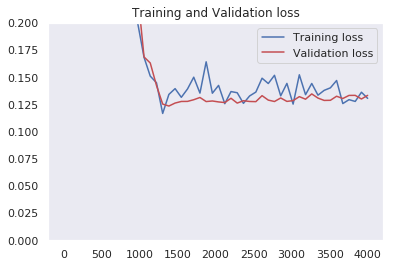
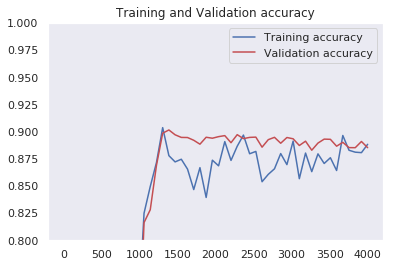

<h2>Cell Report:</h2><br>
**1.** This NN consists of Input layer->500 Neurons->300 Neurons->Single Output Neuron.<br>
**2.** *Keep_prob* of Dropout is set to 0.50<br>
**3.** A Learning Curve is also generated that will be discussed further on.<br>


### 3.6 DNN 6

In [ ]:

lossArr =  np.array([])
accArr= np.array([])
val_lossArr =  np.array([])
val_accArr= np.array([])

epochArr=  np.array([])
pred_500X300_kp80 = pd.DataFrame()
pred_500X300_kp80['Id']= train_df['Id']



# Python optimisation variables
learning_rate = 0.001
epochs = 4000
batch_size = 80

#Reset TF graph
tf.reset_default_graph()


# placeholders for a tensor that will be always fed.
X = tf.placeholder(dtype=tf.float32, shape = [None, 403])
Y = tf.placeholder(dtype=tf.float32, shape = [None, 1])
keep_prob = tf.placeholder(tf.float32)
is_training = tf.placeholder(tf.bool)

# Training Data
n_samples = y_trainRanked.shape[0]

# # Set model weights

# # the weights connecting the input to the hidden layer


W1 = tf.Variable(tf.ones([403, 500]), name='W1',dtype=tf.float32)
b1 = tf.Variable(tf.zeros([500]), name='b1',dtype=tf.float32)

# and the weights connecting the hidden layer to the output layer
W2 = tf.Variable(tf.ones([500, 300]), name='W2',dtype=tf.float32)
b2 = tf.Variable(tf.zeros([300]), name='b2',dtype=tf.float32)

# and the weights connecting the hidden layer to the output layer
W3 = tf.Variable(tf.ones([300, 1]), name='W3',dtype=tf.float32)
b3 = tf.Variable(tf.zeros([1]), name='b3',dtype=tf.float32)



# calculate the output of the hidden layer
hidden_out = tf.add(tf.matmul(X, W1), b1)
hidden_out = bn_layer_top(hidden_out,'hidden_out_bn', is_training=is_training)
hidden_out = tf.nn.relu(hidden_out)
drop_out = tf.nn.dropout(hidden_out, keep_prob)  # DROP-OUT here

# calculate the output of the hidden layer 2
hidden_out2 = tf.add(tf.matmul(drop_out, W2), b2)
hidden_out2 = bn_layer_top(hidden_out2,'hidden_out_bn2', is_training=is_training)
hidden_out2 = tf.nn.relu(hidden_out2)
drop_out2 = tf.nn.dropout(hidden_out2, keep_prob)  # DROP-OUT here

#Prediction

pred = tf.add(tf.matmul(drop_out2, W3), b3)




 # Define a loss function
deltas = tf.abs(pred - Y)
loss = tf.reduce_sum(deltas)/batch_size





#  Note, minimize() knows to modify W and b because Variable objects are               trainable=True by default
optimiser = tf.train.AdamOptimizer(learning_rate).minimize(loss) 





# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training

# start the session
with tf.Session() as sess:
    # initialise the variables
    sess.run(init)
    total_batch = int(len(X_trainRanked) / batch_size)
    val_total_batch = int(len(X_valRanked) / batch_size)

    for epoch in range(epochs):
        avg_cost = 0
        avg_acc = 0
        avg_val_cost = 0
        avg_val_acc = 0
        for i in range(total_batch):
            batch_x, batch_y = next_batch(num=batch_size,data=X_trainRanked,labels=y_trainRanked)
            _, c = sess.run([optimiser, loss], 
                         feed_dict={X: batch_x, Y: batch_y, keep_prob : 0.80, is_training: True},)
            train_pred=sess.run(pred, feed_dict={X: batch_x,keep_prob : 1.0, is_training: False})
            c= rmse(batch_y,train_pred)
            a= r2_score(batch_y, train_pred, multioutput='variance_weighted')
            avg_cost += c / total_batch
            avg_acc += a / total_batch
        
            
        val_pred=sess.run(pred, feed_dict={X: X_valRanked,keep_prob : 1.0, is_training: False})
        val_c= rmse(y_valRanked,val_pred)
        val_a= r2_score(y_valRanked, val_pred, multioutput='variance_weighted')
        avg_val_cost = val_c
        avg_val_acc = val_a 
        print("Epoch:", (epoch + 1), "cost =", "{:.3f}".format(avg_cost))

        lossArr = np.append (lossArr, [avg_cost])
        accArr= np.append (accArr, [avg_acc])
        val_lossArr = np.append (val_lossArr, [avg_val_cost])
        val_accArr= np.append (val_accArr, [avg_val_acc])
        epochArr= np.append (epochArr, [epoch])
       
    
    
    #Predict for Evaluation 
    pred_500X300_kp80['SalePrice'] = sess.run(pred, feed_dict={X: X_valRanked,keep_prob : 1.0, is_training: False})

       
    

lcurves()    

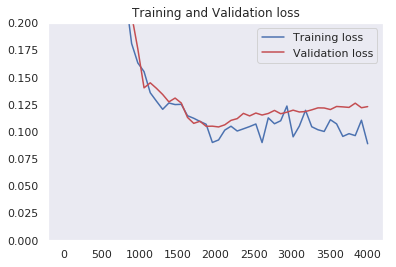
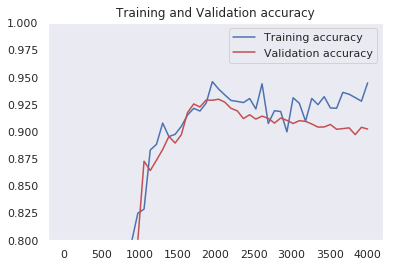

<h2>Cell Report:</h2><br>
**1.** This NN consists of Input layer->500 Neurons->300 Neurons->Single Output Neuron.<br>
**2.** *Keep_prob* of Dropout is set to 0.80<br>
**3.** A Learning Curve is also generated that will be discussed further on.<br>


### 3.7 Manual Search Conclusion & DNN Metrics

In [ ]:
###########
plt.scatter(np.exp(pred_500X300_kp90['SalePrice']), np.exp(label_df["SalePrice"]),s=2)
plt.plot([0, 800000], [0, 800000], '--r')

#Score/Accuracy
print("RMSE --> ", rmse(label_df["SalePrice"],pred_500X300_kp90['SalePrice']))

print("Accuracy --> ", r2_score(label_df["SalePrice"], pred_500X300_kp90['SalePrice'],multioutput='variance_weighted'))
plt.xlabel('Predictions (y_pred)', size=10)
plt.ylabel('Real Values (y_train)', size=10)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

plt.title('Predictions vs Real Values - 500x300 keep_prob 0.90(1100 epoch)', size=15)
plt.text(0, 700000, 'Mean RMSE: {:.6f} / Accuracy: {:.6f}'.format(rmse(label_df["SalePrice"],pred_500X300_kp90['SalePrice']), 
                                                             r2_score(label_df["SalePrice"], pred_500X300_kp90['SalePrice'],multioutput='variance_weighted'), fontsize=15))
plt.show()
###########

plt.scatter(np.exp(pred_500X300_kp80['SalePrice']), np.exp(label_df["SalePrice"]),s=2)
plt.plot([0, 800000], [0, 800000], '--r')

#Score/Accuracy
print("RMSE --> ", rmse(label_df["SalePrice"],pred_500X300_kp80['SalePrice']))

print("Accuracy --> ", r2_score(label_df["SalePrice"], pred_500X300_kp80['SalePrice'],multioutput='variance_weighted'))
plt.xlabel('Predictions (y_pred)', size=10)
plt.ylabel('Real Values (y_train)', size=10)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

plt.title('Predictions vs Real Values - 500x300 keep_prob 0.80(1100 epoch)', size=15)
plt.text(0, 700000, 'Mean RMSE: {:.6f} / Accuracy: {:.6f}'.format(rmse(label_df["SalePrice"],pred_500X300_kp80['SalePrice']), 
                                                             r2_score(label_df["SalePrice"], pred_500X300_kp80['SalePrice'],multioutput='variance_weighted'), fontsize=15))

plt.show()


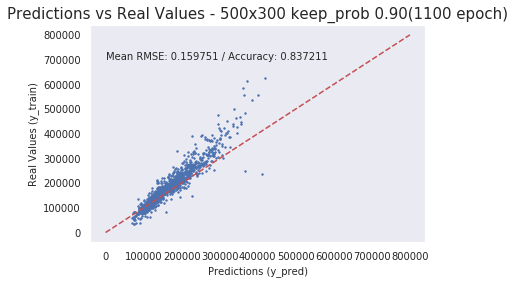
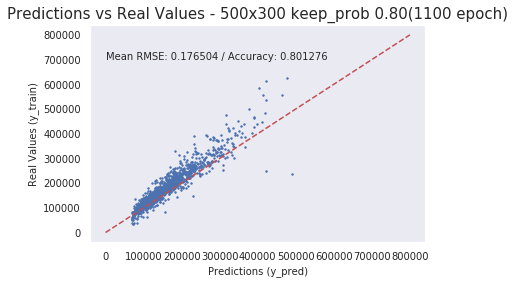

<h2>Cell Report:</h2><br>
**1.** Rightaway judging by the Leanring Curves the models with Dropout *keep_prob* 0.5 and 0.9 were shown to be inferior. Models with *keep_prob* 0.5 were grossly underfitting the patterns in the data because of aggressive regularization as can be seen from the loss curves that flattened quickly without improving. Models with *keep_prob* faired better but their validation and train curves diverged away from each other quickly, meaing there were overfiting the patterns in the dataset. A middle point value of 0.8 was choosen for the final model.<br>
**2.** Models In-500-300-Out and In-200-200-Out performed faily similarly, but the former gave a better Kaggle score. Model In-50-50-Out, which had two hidden layers with 50 neurons each had Learning Curves which flattened fairly quickly indicating the lack of capacity to learn. Model with only a single 500 neuron hidden layer was a bit immune to Dropout rates, and could have performed better with more neurons but the computer cost would have been too much and the same results as other NNs with less neurons with more layers.<br>
**3.** The Shallow NN with the single hidden layer was not able to fit the data properly, adding more Neurons would fix it but compute cost would rise greatly.<br>
**4.** Scattter plot shows better score for model with *keep_prob* rate 0.9 as it overfitted the training results.<br>
**5.** Model In-500-300-Out was choosen as the final model as it gave the best Kaggle score( all of the models were tested with Kaggle Submit).<br>



## 5. Final Model(Used for Kaggle Submission)

In [ ]:
ntrain = train_df_munged.shape[0]

y_trainRanked= label_df.values
y_trainRanked=np.reshape(y_trainRanked, (ntrain, 1))

X_testRanked= test_df_munged.values
test1X=X_testRanked

X_trainRanked= train_df_munged.values
yShape=y_trainRanked.shape
XShape=X_trainRanked.shape
print(XShape)
print(y_trainRanked.shape)
print(y_trainRanked[2])
def SaveResult2CSV(pred4Kaggle, epochNo):
    submission=pd.DataFrame()
    submission['Id']= test2.Id
    
    #Predict for Kaggle Test.CSV data 
    pred_TestKaggle = pred4Kaggle

       
    
    #Revert from Log to Exp to get proper House Prices
    final_predictions= np.exp(pred_TestKaggle)
    #Kaggle cloud save
    submission['SalePrice']= final_predictions
    # Brutal approach to deal with predictions close to outer range 
    q1 = submission['SalePrice'].quantile(0.0042)
    q2 = submission['SalePrice'].quantile(0.99)

    submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x > q1 else x*0.77)
    submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x < q2 else x*1.1)
    submission.head()
    create_download_link(submission)
    filename = "DNNKagglePredsMay{}.csv".format(epochNo)
    submission.to_csv(filename,index=False)
    
    print('Saved file: ' + filename)

# Python optimisation variables
learning_rate = 0.0001
epochs = 2
batch_size = 80


#Reset TF graph
tf.reset_default_graph()


# placeholders for a tensor that will be always fed.
X = tf.placeholder(dtype=tf.float32, shape = [None, 403])
Y = tf.placeholder(dtype=tf.float32, shape = [None, 1])
keep_prob = tf.placeholder(tf.float32)
is_training = tf.placeholder(tf.bool)

# Training Data
n_samples = y_trainRanked.shape[0]

# # Set model weights

# # the weights connecting the input to the hidden layer


W1 = tf.Variable(tf.ones([403, 500]), name='W1',dtype=tf.float32)
b1 = tf.Variable(tf.zeros([500]), name='b1',dtype=tf.float32)

# and the weights connecting the hidden layer to the output layer
W2 = tf.Variable(tf.ones([500, 300]), name='W2',dtype=tf.float32)
b2 = tf.Variable(tf.zeros([300]), name='b2',dtype=tf.float32)

# and the weights connecting the hidden layer to the output layer
W3 = tf.Variable(tf.ones([300, 1]), name='W3',dtype=tf.float32)
b3 = tf.Variable(tf.zeros([1]), name='b3',dtype=tf.float32)



# calculate the output of the hidden layer
hidden_out = tf.add(tf.matmul(X, W1), b1)
hidden_out = bn_layer_top(hidden_out,'hidden_out_bn', is_training=is_training)
hidden_out = tf.nn.relu(hidden_out)
drop_out = tf.nn.dropout(hidden_out, keep_prob)  # DROP-OUT here

# calculate the output of the hidden layer 2
hidden_out2 = tf.add(tf.matmul(drop_out, W2), b2)
hidden_out2 = bn_layer_top(hidden_out2,'hidden_out_bn2', is_training=is_training)
hidden_out2 = tf.nn.relu(hidden_out2)
drop_out2 = tf.nn.dropout(hidden_out2, keep_prob)  # DROP-OUT here

#Prediction

pred = tf.add(tf.matmul(drop_out2, W3), b3)




 # Define a loss function
deltas = tf.abs(pred - Y)
loss = tf.reduce_sum(deltas)/batch_size
# loss=tf.sqrt(loss)

cost = loss  





#  Note, minimize() knows to modify W and b because Variable objects are               trainable=True by default
optimiser = tf.train.AdamOptimizer(learning_rate).minimize(loss) 





# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training

# start the session
with tf.Session() as sess:
    # initialise the variables
    sess.run(init)
    total_batch = int(len(X_trainRanked) / batch_size)
    for epoch in range(epochs):
        avg_cost = 0
        for i in range(total_batch):
            batch_x, batch_y = next_batch(num=batch_size,data=X_trainRanked,labels=y_trainRanked)
            _, c = sess.run([optimiser, loss], 
                         feed_dict={X: batch_x, Y: batch_y, keep_prob : 0.80, is_training: True},)
            avg_cost += c / total_batch
        print("Epoch:", (epoch + 1), "cost =", "{:.3f}".format(avg_cost))
        if(epoch==11300 or epoch==14400 or epoch==16500 or epoch==18800):
            pred_TestKaggle = sess.run(pred, feed_dict={X: test1X,keep_prob : 1.0, is_training: False})
            SaveResult2CSV(pred_TestKaggle,epoch)
    
    submission=pd.DataFrame()
    submission['Id']= test2.Id
    
    #Predict for Kaggle Test.CSV data 
    pred_TestKaggle = sess.run(pred, feed_dict={X: test1X,keep_prob : 1.0, is_training: False})

       
    
    #Revert from Log to Exp to get proper House Prices
    final_predictions= np.exp(pred_TestKaggle)
    #Kaggle cloud save
    submission['SalePrice']= final_predictions
    # Brutal approach to deal with predictions close to outer range 
    q1 = submission['SalePrice'].quantile(0.0042)
    q2 = submission['SalePrice'].quantile(0.99)

    submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x > q1 else x*0.77)
    submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x < q2 else x*1.1)
    submission.head()
    create_download_link(submission)
    filename = 'DNNRegPredictionsMaykp80.csv'
    submission.to_csv(filename,index=False)
    
    print('Saved file: ' + filename)
    

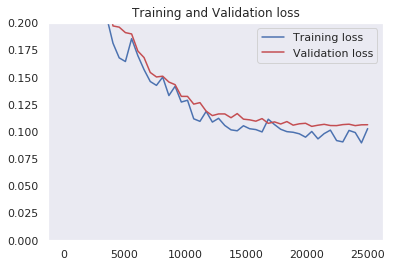
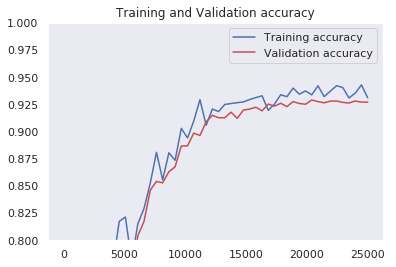

<h2>Cell Report:</h2><br>
**1.** Decision of algorithm and model(1st Submission of Assignment):
* Initially only categorical features were used as input and a low level API TensorFlow fully connected DNN model(80,200,200,1) was made, the Kaggle score was 0.44.

* Then various DNN models were attempted with different combinations of features with different feature engineering, trained using *Geoff Hinton's* rule of thumb.

* Dropout layer was added and improved Kaggle score slightly. Dropout was always set to 0.5.

* Shallow NN with single hidden layer(1000 Neurons) consistently gave best results arcross the board regardless of the level of feature engineering. This was a mistake as it had to do with the dropout rate of 0.5, which was found out later when adjusting hyperparameters.

* For the initial assigment subbmission, a shallow NN of input layer consisting of 126 nodes (one for each NP column), 1 densely connected hidden layer with 1000 nodes per layer was used. The output layer has only single node as this is a regression problem. The architecture of the network is from trial and error. The network was given ample enough size to “**learn**”. [2]

* **ReLU** activation was used with the hidden layer, as it is the industry standard, with the dropout set to 0.8 to prevent **overfitting**. Other activation functions were tried but ReLU performed the best.
* **Dropout** was used for **normalization**.
* **Batch Norm** layer was introduced, and improved the score further, made the model more robust against bad initialization.
* The Kaggle score was: **0.129**.

**2.** For 2nd subbmission after receiving the 1st review:
* 1st subbmission's design decisions were mainly selected with dropout always set to 0.5, this was a big mistake as dropout at this rate was causing **underfitting**. 
* Upon further investigation, dropout was set to 0.2(*keep_prob* 0.8) and it was found that shallow NN was not the best, a DNN (400,500,300,1) was selected as a baseline and gave satisfactory results on Kaggle, score **0.116**.

**3.** For this subbmission:
* ML approch was expanded upon, Learning Curves were added and model was kept the same as the Kaggle score was great.

**4.** Decision and optimization of hyper parameters:
* Hyperpameters were tuned manually and by posting results to Kaggle at each step/change. **Mini-batch learning**( random normalized batch of size 80) was used to train the network, Cross Validation(Test-Train split) was was used and Learning Curve generator added in the style of Keras( avg. *train loss* caluated aross *Steps-Per-Epoch* and *validation loss* calulated at every Epoch end).
*  Adam Optimizer was used as it performed the best thought trial and error method( other Optimizrs used were AdaGrad and RMSprop), with the industry standard **learning rate** and parameters. Learning rate for the final model was 0.0001 rather than the standard 0.001 because the higher rate was too jittery( as seen from the Learning Curves). Rate of 0.0001 made it easier for manual early stopping.
* Epochs of 20000 was selected with trail-and-error method based on observation of **Kaggle score** and the Learning Curve.
* Both RMSE and MAE were trialed as loss functions, MAE gave better results with the optimizer.
* Brutal approach from agehsbarg's Kaggle Kernel was to deal with predictions close to outer range as regression often does not deal well with edge cases. Using it resulted in jump of Kaggle score from **0.127** to **0.116**. [12]

**5.** Final model:
* Input->500 Neurons->300 Neurons->Single Output Neuron.
* Batch Norm at the two hidden layers.
* ReLU activation function at each layer except the final Output Neuron.
* Dropout( *keep_prob*:0.80) at two of the hidden layers.



## Results:

1st Submission:
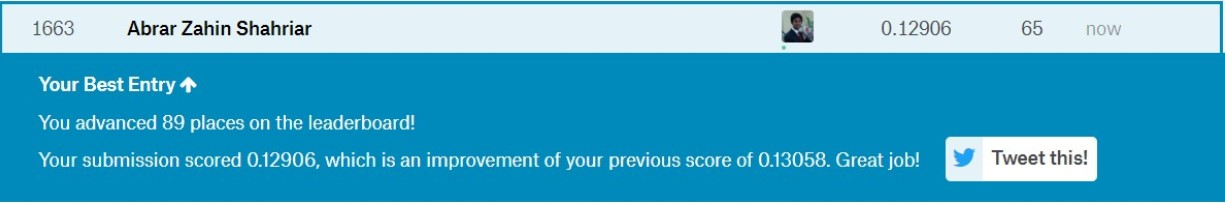
2nd Submission after last review:
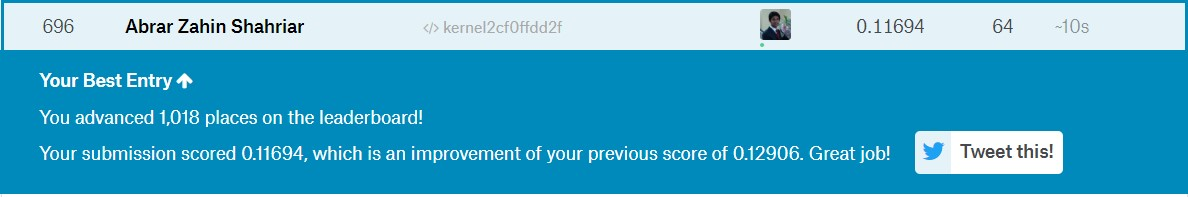
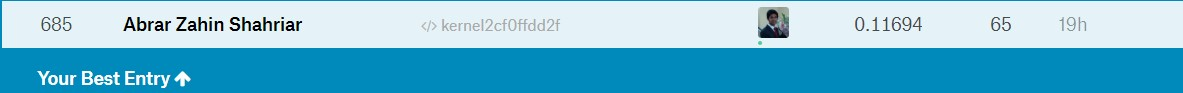
Kaggle score of 0.11694 was received with TensorFlow NN (low level API).

**Kaggle position:** 685 (Top 15.6% at the time of Submission)

## Discussion:

* Kaggle Score could have been improved with Grid Search but was abandoned in the interest of time.
* Feature Engineering, Outlier Removal, Skewness Reduction and Hyper Parameter Tuning had great impact on the improvement of the Final Score.
* K-fold CV could have been applied for better Learning Curves as Validation curves depend a lot on the distribution of data.
* More Advanced Regression Techniques like XGBoost would have been fruitful for a more Generic Model.
* Was not about to find a way to do cross validation with batch learning NN.
* TensorFlow Low Level API was difficult to get used to but cleared up many misconceptions that came from only using "blackbox" solutions.


## Conclusion:


**Neural Network**: Neural Network has no real Theory that explains how to choose the number of Hidden Layers except the Thumb Rule and Trial & Error procedure. It takes a lot of time when the Input Data is large, needs powerful computing machines. It is difficult to interpret the results and very hard to interpret and measure the impact of individual predictors.

**The Local Minima Issue**: The Adam Optimizer produces the optimal weights for the Local Minima, the Global Minima of the Error Function is not guaranteed.

Citations-
1.	https://www.kaggle.com/surya635/house-price-prediction
2.	https://www.youtube.com/watch?v=UojVVG4PAG0
3.	http://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example
4.	https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/
5.	https://www.dataquest.io/blog/kaggle-getting-started/
6.	http://aqibsaeed.github.io/2016-07-07-TensorflowLR/
7.	https://stackoverflow.com/questions/40994583/how-to-implement-tensorflows-next-batch-for-own-data
8.  https://www.kaggle.com/humananalog/xgboost-lasso
9.  https://towardsdatascience.com/choosing-the-right-encoding-method-label-vs-onehot-encoder-a4434493149b
10. https://medium.com/deeper-learning/glossary-of-deep-learning-batch-normalisation-8266dcd2fa82
11. Zhongyu Kuang- https://stackoverflow.com/users/4678222/zhongyu-kuang?tab=topactivity
12. https://www.kaggle.com/agehsbarg/top-10-0-10943-stacking-mice-and-brutal-force


